# Problématique

**Problématique:** Étude de l'impact de la pollution de l'air sur les maladies respiratoires:

La qualité de l'air est un enjeu majeur de santé publique, notamment dans les zones urbaines où la concentration de polluants atmosphériques est souvent élevée. La pollution de l'air extérieur est l'un des principaux facteurs de risque de décès prématuré. 


![jupyter](../fig/number-of-deaths-by-risk-factor.png)

Parmi les conséquences néfastes de la pollution de l'air, son impact sur les maladies respiratoires suscite une préoccupation croissante à l'échelle mondialeante. 

D'après les analyses précédentes de https://ourworldindata.org/, 7,2 % des décès dans le monde sont attribués à la pollution de l'air extérieur. Dans certains pays, elle est responsable d'un décès sur dix. Les taux de mortalité dus à la pollution de l'air extérieur varient d'un facteur 10 dans le monde. Les taux de mortalité sont généralement plus élevés dans les pays à revenus moyens. Globalement, et dans la plupart des pays, le nombre de décès dus à la pollution de l'air a augmenté. 

La pollution de l'air est un enjeu mondial complexe et urgent, nécessitant une compréhension approfondie des facteurs qui contribuent à la variabilité des impacts sur la santé. Alors que des initiatives ont été lancées pour réduire les émissions de polluants dans certains pays, il est impératif de comprendre pourquoi la mortalité attribuée à la pollution de l'air persiste et augmente dans certaines régions, en particulier parmi les populations les plus vulnérables.

En regardant les données sur la pollution de l'air et les taux de maladies respiratoires, ce projet cherche à identifier des tendances, des corrélations et des disparités géographiques qui pourraient contribuer à une meilleure compréhension de cette problématique complexe.

<!-- 要写的：

Les polluants ....有哪些污染物

Qualification de qualite de l'air AQI计算方式简述

 -->

<!-- 要补充：除了呼吸道疾病意外，空气质量还可能导致其他健康问题 -->

# Partie 1. Acquisition de données

## 1.1 données de la qualité de l'air (par ville)

#### a) Air quality data from WHO
---
- <p>WHO Ambient Air quality database: <p>Dans le fichier "../data/airquality/who/who_ambient_air_quality_database_version_2023_(v6.0).xlsx"<p>

- Téléchargement: https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database


In [4]:
!pip install openpyxl

Les attributs de ce dataset:

In [333]:
import pandas as pd
who_df = pd.read_excel("../data/airquality/who/who_ambient_air_quality_database_version_2023_(v6.0).xlsx", sheet_name=2)
print(who_df.columns.values)

['who_region' 'iso3' 'country_name' 'city' 'year' 'version'
 'pm10_concentration' 'pm25_concentration' 'no2_concentration'
 'pm10_tempcov' 'pm25_tempcov' 'no2_tempcov' 'type_of_stations'
 'reference' 'web_link' 'population' 'population_source' 'latitude'
 'longitude' 'who_ms']


Le dataset nous offre les données sur les particules (PM2.5, PM10)  et NO2 en années et en villes. 

In [207]:
who_df

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41359,5_Emr,SAU,Saudi Arabia,Jizan,2014,version 2023,148.0,NaN,NaN,NaN,NaN,NaN,NaN,"Ministry of Environment, Water, and Agriculture",NaN,127743.0,NaN,16.885875,42.573386,1
41360,5_Emr,SAU,Saudi Arabia,Jizan,2013,version 2023,208.0,NaN,NaN,NaN,NaN,NaN,NaN,"Ministry of Environment, Water, and Agriculture",NaN,127743.0,NaN,16.885875,42.573386,1
41361,5_Emr,SAU,Saudi Arabia,Jizan,2012,version 2023,184.0,NaN,NaN,NaN,NaN,NaN,NaN,"Ministry of Environment, Water, and Agriculture",NaN,127743.0,NaN,16.885875,42.573386,1
41362,5_Emr,SAU,Saudi Arabia,Jizan,2011,version 2023,316.0,NaN,NaN,NaN,NaN,NaN,NaN,"Ministry of Environment, Water, and Agriculture",NaN,127743.0,NaN,16.885875,42.573386,1


In [201]:
who_df_nan_percentage = who_df.dropna(subset=['city', 'year'], how='any').iloc[:,6:12].isna().mean() * 100
print("Show percentage of NaN values for the air pollution attributes:\n----")
print(who_df_nan_percentage)

Show percentage of NaN values for the air pollution attributes:
----
pm10_concentration    31.855425
pm25_concentration    47.864346
no2_concentration     35.469795
pm10_tempcov          48.341899
pm25_tempcov          61.024920
no2_tempcov           44.419665
dtype: float64


Visualisation des données manquantes:

In [194]:
!pip install missingno

<Axes: >

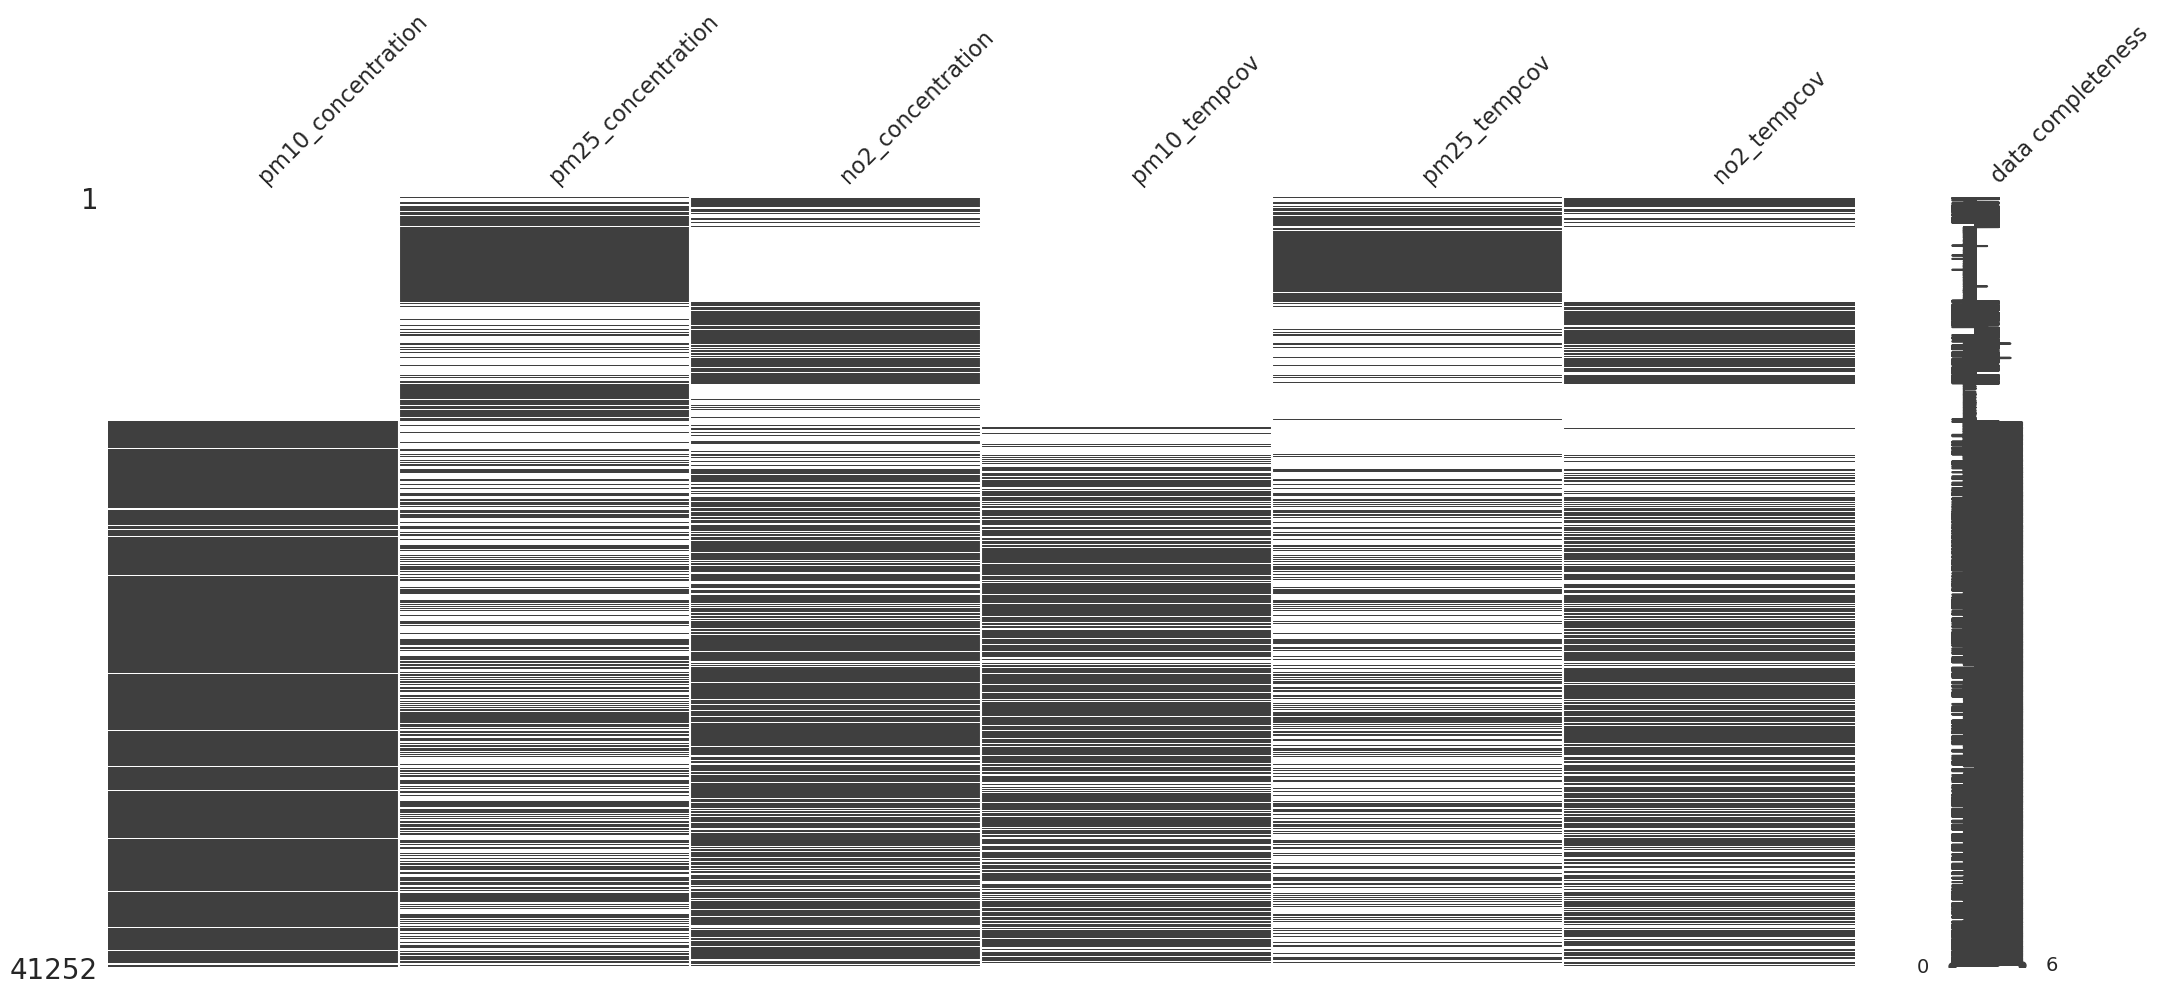

In [335]:
import missingno as msno
fig = msno.matrix(who_df.dropna(subset=['city', 'year'], how='any').iloc[:,6:12], labels=True)
fig_copy = fig.get_figure()
fig_copy.savefig('../fig/who_msno.png', bbox_inches = 'tight')
fig


In [105]:
df_who_sh = who_df[who_df['city']=='Shanghai']
who_df_nan_percentage_sh = df_who_sh.dropna(subset=['year'], how='any').iloc[:,6:12].isna().mean() * 100
print("Show percentage of NaN values for the air pollution attributes in Shanghai:\n----")
print(who_df_nan_percentage_sh)

Show percentage of NaN values for the air pollution attributes in Shanghai:
----
pm10_concentration     55.555556
pm25_concentration      0.000000
no2_concentration      55.555556
pm10_tempcov          100.000000
pm25_tempcov           11.111111
no2_tempcov           100.000000
dtype: float64


Visualisation des données manquantes pour Shanghai:

<Axes: >

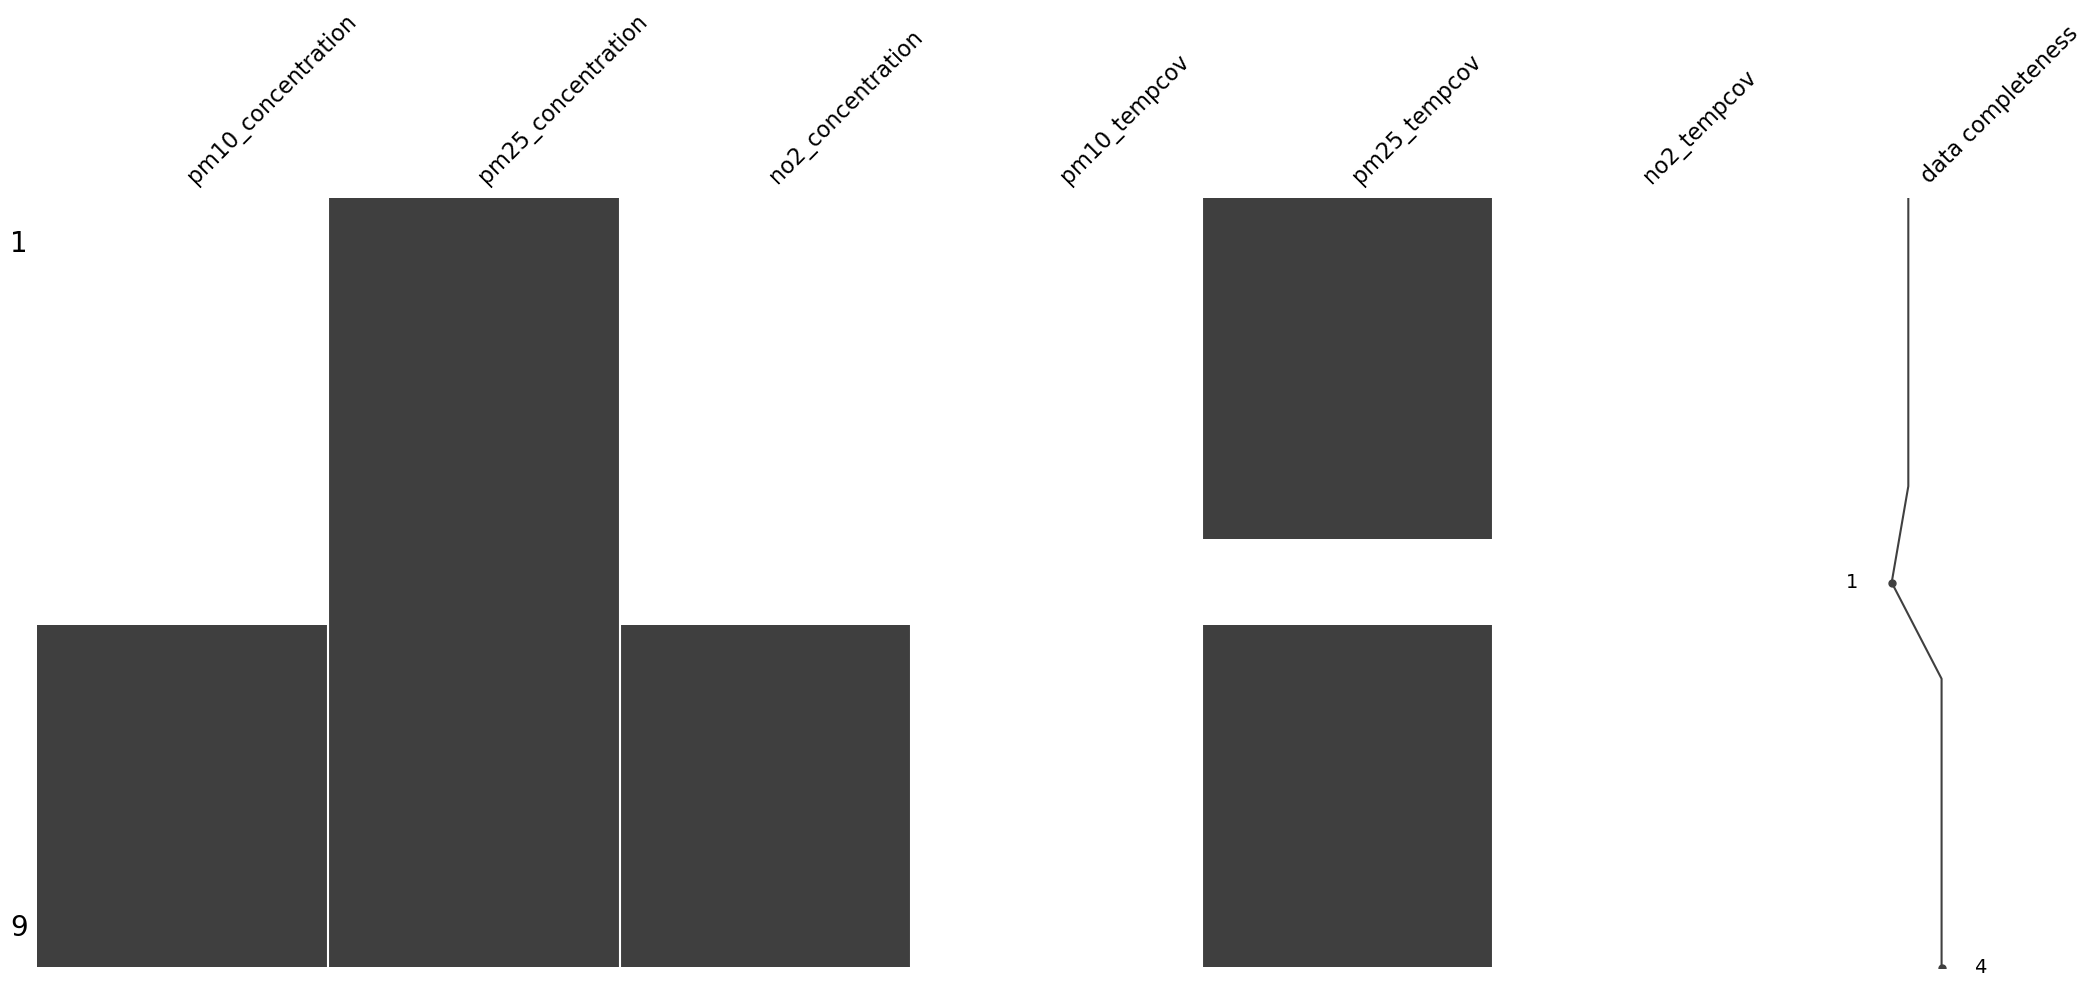

In [206]:
msno.matrix(who_df[who_df['city']=='Shanghai'].dropna(subset=['year'], how='any').iloc[:,6:12], labels=True)

#### b) Air quality data from the World Air Quality Index project (WAQI: aqicn.org)
---
Le WAQI est un projet à but non lucratif lancé en 2007. Sa mission est de sensibiliser les citoyens à la pollution de l'air et de fournir des informations unifiées et mondiales sur la qualité de l'air.

Toutes les données sur la qualité de l'air affichées sur l'Indice mondial de la qualité de l'air sont les données officielles de l'Agence de protection de l'environnement (EPA) de chaque pays. 

La liste complète des sources de l'EPA utilisée: https://aqicn.org/sources/fr/

L’indice américain EPA a été choisi pour harmoniser les données.

Ce site (https://aqicn.org/historica  permet de télécharger les données de sur la qualité de l'air depuis il y a 121 mois en fonction du nom de la ville.


In [32]:
aqicn_path = "../data/airquality/aqicn/"

def get_aqicn_city(city):
    path = aqicn_path + city + ".csv"
    return pd.read_csv(path)

In [33]:
df_aqicn_sh = get_aqicn_city("shanghai")
df_aqicn_sh.columns.values

array(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'],
      dtype=object)

Le dataset fournit les données quotidiennes des attributs suivants: AQI de PM2.5, PM10, O3, NO2, SO2, CO. (Il ne donne pas la valeur de concentration, mais s'agit plutôt de la valeur convertie de l'IQA pour chaque polluant.)
<!-- concentration de PM2.5($\mu g/m^3$), PM10($\mu g/m^3$), O3(ppm), NO2(ppb), SO2(ppb), CO(ppm).  -->

On présente ici quelques lignes de données de la ville de Shanghai:

In [34]:
df_aqicn_sh.columns = ['date', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']
df_aqicn_sh['date'] = pd.to_datetime(df_aqicn_sh['date'])
for polluant in ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']:
    df_aqicn_sh[polluant]=  pd.to_numeric(df_aqicn_sh[polluant],errors='coerce')
df_aqicn_sh

,date,PM2.5,PM10,O3,NO2,SO2,CO
0,2024-01-01,151.0,55.0,28.0,23.0,3.0,7.0
1,2024-01-02,113.0,76.0,28.0,23.0,3.0,10.0
2,2024-01-03,165.0,92.0,39.0,34.0,4.0,12.0
3,2024-01-04,179.0,75.0,25.0,38.0,6.0,10.0
4,2024-01-05,165.0,109.0,37.0,45.0,5.0,14.0
...,...,...,...,...,...,...,...
3576,2018-12-31,NaN,34.0,26.0,13.0,4.0,3.0
3577,2017-09-10,NaN,26.0,33.0,16.0,3.0,9.0
3578,2016-03-13,NaN,61.0,51.0,13.0,8.0,7.0
3579,2014-12-31,NaN,55.0,24.0,19.0,15.0,6.0


<Axes: >

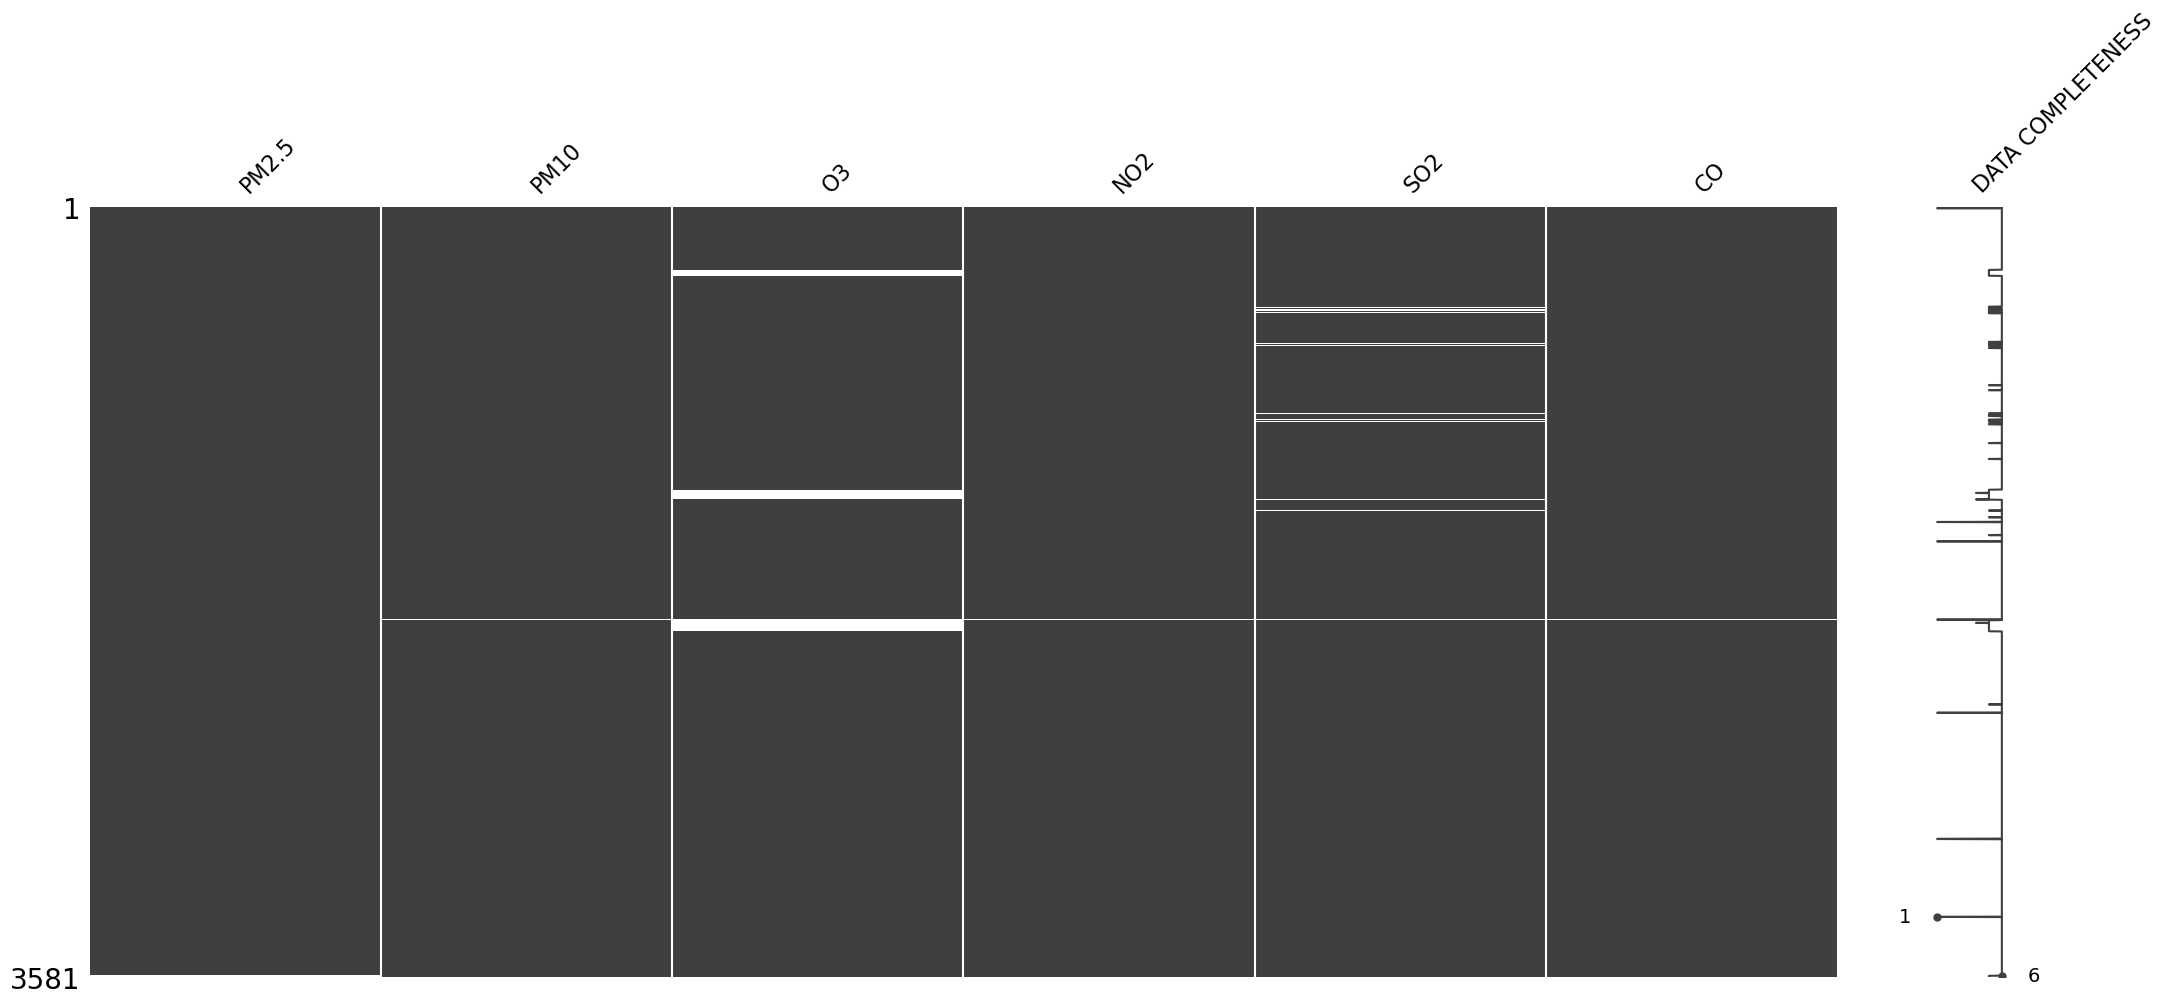

In [218]:
msno.matrix(df_aqicn_sh.iloc[:,1:7], labels=True)

#### c) Air quality data from berkeleyearth
---
Ce site (https://berkeleyearth.org/air-quality-location/) permet de télécharger les données horaires passées de la concentration de PM2.5 (μg/m³) depuis 2013 selon le nom de ville ou pays.



In [1]:
# city="Shanghai"

from pyspark import SparkConf, SparkContext
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import time
from operator import add

berkeleyearth_path = "../data/airquality/berkeleyearth/"
spark_be = SparkSession.builder.master("local[10]").config("spark.driver.memory", "15g")\
.appName("berkeley_earth").getOrCreate()
# spark = SparkSession.builder \
#  .master("local[10]") \
#  .config("spark.driver.memory", "15g") \
#  .appName("musique") \
#  .getOrCreate()
def row_to_dataframe(record):
    return pd.DataFrame([record], columns=fieldnames)

def toCsv_berkeleyearth_by_city(city):
    path = berkeleyearth_path + city + ".txt"
    csv_path = berkeleyearth_path + city + ".csv"
    # sc = spark_be.sparkContext
    # ac = sc.textFile(path, minPartitions=4, use_unicode=True).map(lambda element: element.split("\t"))
    # # print(ac.count())
    # # print(ac.zipWithIndex().take(10))
    # # remove first 7 lines
    # ac = ac.zipWithIndex().filter(lambda row: row[1] > 7).map(lambda row: row[0])
    # ac_pd = ac.map(row_to_dataframe)
    # ac_df = ac_pd.toDF().toPandas()
    fieldnames = ['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective']

    data=pd.read_csv(path, sep='\t', header=None, names=fieldnames, skiprows=8)
    # data["City"] = city
    data.to_csv(csv_path, index=False)
    # return ac_pd
    return data
toCsv_berkeleyearth_by_city("Shanghai")

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2014,5,16,9,55.69,0.0,1
1,2014,5,16,10,57.35,0.0,1
2,2014,5,16,11,56.46,0.0,1
3,2014,5,16,12,57.41,0.0,1
4,2014,5,16,13,60.16,0.0,1
...,...,...,...,...,...,...,...
80293,2023,7,6,14,31.40,0.0,0
80294,2023,7,6,14,31.40,0.0,0
80295,2023,7,6,14,31.40,0.0,0
80296,2023,7,6,14,31.40,0.0,0


On vois qu'il y a des répétitions de lignes bizarres dans les dernières lignes.

Ici, seule la columne de la concentration PM2.5 contient des données valides sur la pollution.




In [10]:
df_berkeley_sh = pd.read_csv("../data/airquality/berkeleyearth/Shanghai.csv") \
.drop_duplicates()
df_berkeley_sh['date'] = pd.to_datetime(df_berkeley_sh[['Year', 'Month', 'Day']])
df_berkeley_sh = df_berkeley_sh.drop(columns=['Year', 'Month', 'Day', 'PM10_mask'])
df_berkeley_sh

,UTC Hour,PM2.5,Retrospective,date
0,9,55.69,1,2014-05-16
1,10,57.35,1,2014-05-16
2,11,56.46,1,2014-05-16
3,12,57.41,1,2014-05-16
4,13,60.16,1,2014-05-16
...,...,...,...,...
77376,11,25.37,0,2023-07-06
77377,12,25.37,0,2023-07-06
77378,13,24.62,0,2023-07-06
77379,14,24.69,0,2023-07-06


In [30]:
print(df_berkeley_sh[df_berkeley_sh['Retrospective']==1].count())
print(df_berkeley_sh[df_berkeley_sh['Retrospective']==1])
print(df_berkeley_sh.isna().mean())

UTC Hour         33676
PM2.5            33676
Retrospective    33676
date             33676
dtype: int64
       UTC Hour  PM2.5  Retrospective       date
0             9  55.69              1 2014-05-16
1            10  57.35              1 2014-05-16
2            11  56.46              1 2014-05-16
3            12  57.41              1 2014-05-16
4            13  60.16              1 2014-05-16
...         ...    ...            ...        ...
33672        20  87.76              1 2018-04-30
33673        21  82.18              1 2018-04-30
33674        22  75.16              1 2018-04-30
33675        23  73.79              1 2018-04-30
33676         0  81.03              1 2018-05-01

[33676 rows x 4 columns]
UTC Hour         0.0
PM2.5            0.0
Retrospective    0.0
date             0.0
dtype: float64


#### d) Données de la qualité de l'air des ville en Chine: aqistudy
---
Ce cite (https://www.aqistudy.cn/historydata/) fournit des données moyennes quoditiennes de l'IQA, PM2.5($\mu g/m^3$), PM10, CO, NO2, SO2, O3 depuis 2014 pour 389 villes en Chine.

In [17]:
import requests
from bs4 import BeautifulSoup

header={
    'Referer': "https://www.bing.com/",
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0",
}


cn_cities = requests.get("https://www.aqistudy.cn/historydata/", headers=header)
cn_cities = BeautifulSoup(cn_cities.text, 'html.parser')
# cn_cities = cn_cities.findall("div", class_ = "all")
cn_cities = cn_cities.findAll("div", class_= "all")[0].findAll("a")
# cn_cities = cn_cities.findAll("li")
# print(cn_cities)
CNcities = []
for c in cn_cities:
    CNcities.append(c.contents[0])

print(len(CNcities))
print(CNcities)

389
['阿坝州', '安康', '阿克苏地区', '阿里地区', '阿拉善盟', '阿勒泰地区', '安庆', '安顺', '鞍山', '克孜勒苏州', '安阳', '蚌埠', '白城', '保定', '北海', '宝鸡', '北京', '毕节', '博州', '白山', '百色', '保山', '白沙', '包头', '保亭', '本溪', '巴彦淖尔', '白银', '巴中', '滨州', '亳州', '长春', '昌都', '常德', '成都', '承德', '赤峰', '昌吉州', '五家渠', '昌江', '澄迈', '重庆', '长沙', '常熟', '楚雄州', '朝阳', '沧州', '长治', '常州', '潮州', '郴州', '池州', '崇左', '滁州', '定安', '丹东', '东方', '东莞', '德宏州', '大理州', '大连', '大庆', '大同', '定西', '大兴安岭地区', '德阳', '东营', '黔南州', '达州', '德州', '儋州', '鄂尔多斯', '恩施州', '鄂州', '防城港', '佛山', '抚顺', '阜新', '阜阳', '富阳', '抚州', '福州', '广安', '贵港', '桂林', '果洛州', '甘南州', '固原', '广元', '贵阳', '甘孜州', '赣州', '广州', '淮安', '海北州', '鹤壁', '淮北', '河池', '海东地区', '邯郸', '哈尔滨', '合肥', '鹤岗', '黄冈', '黑河', '红河州', '怀化', '呼和浩特', '海口', '呼伦贝尔', '葫芦岛', '哈密地区', '海门', '海南州', '淮南', '黄南州', '衡水', '黄山', '黄石', '和田地区', '海西州', '河源', '衡阳', '汉中', '杭州', '菏泽', '贺州', '湖州', '惠州', '吉安', '金昌', '晋城', '景德镇', '金华', '西双版纳州', '九江', '吉林', '即墨', '江门', '荆门', '佳木斯', '济南', '济宁', '胶南', '酒泉', '句容', '湘西州', '金坛', '鸡西', '嘉兴', '江阴', '揭阳', '济源', '嘉峪关', '胶州', '焦作', '锦

In [72]:
with open('./data/airquality/aqistudy/cities.txt', 'w', encoding='utf-8') as file:
    for city in CNcities:
        file.write(city + '\n')

In [19]:
import os
import csv
import json
aqistudy_path = "../data/airquality/aqistudy/"

def toCsv_aqistudy_by_city(city):
    path = aqistudy_path+city
    files = os.listdir(path)
    csv_filename = aqistudy_path+city+".csv"
    file_exists = os.path.isfile(csv_filename)
    if file_exists and os.stat(csv_filename).st_size != 0:
        return
    print(files)
    for json_filename in files:
        if not json_filename.lower().endswith('.json'):
            continue
        with open(csv_filename, 'a', newline='', encoding='utf-8') as csvfile:
            fieldnames = ['Year', 'Month', 'Day', 'AQI', 'Quality Grade', 'PM2.5', 'PM10', 'CO', 'SO2', 'NO2', 'O3_8h']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
            if not file_exists or os.stat(csv_filename).st_size == 0:
                writer.writeheader()
    
            with open(path+"/"+json_filename, 'r', encoding='utf-8') as json_file:
                json_data = json.load(json_file)
                for record in json_data:
                    year, month, day = map(int, record['date'].split('-'))
                    
                    writer.writerow({
                        'Year': year,
                        'Month': month,
                        'Day': day,
                        'AQI': int(record['AQI']),
                        'Quality Grade': record['Quality grade'],
                        'PM2.5': int(record['PM2.5']),
                        'PM10': int(record['PM10']),
                        'CO': float(record['CO']),
                        'SO2': int(record['SO2']),
                        'NO2': int(record['NO2']),
                        'O3_8h': int(record['O3_8h'])
                    })


# json_to_csv(json_data, 'output.csv')
# 
    

Les données pour Shanghai:

In [20]:
toCsv_aqistudy_by_city("上海")

In [58]:
df_aqistudy_sh = pd.read_csv("../data/airquality/aqistudy/上海.csv")
df_aqistudy_sh.columns = ['Year', 'Month', 'Day', 'AQI', 'Quality Grade', 'PM2.5', 'PM10', 'CO', 'SO2', 'NO2', 'O3']
df_aqistudy_sh['date'] = pd.to_datetime(df_aqistudy_sh[['Year', 'Month', 'Day']])
df_aqistudy_sh = df_aqistudy_sh.drop(columns=['Year', 'Month', 'Day', 'Quality Grade'])
for idx in ['AQI', 'PM2.5', 'PM10', 'CO', 'SO2', 'NO2', 'O3']:
    df_aqistudy_sh[idx] = pd.to_numeric(df_aqistudy_sh[idx],errors='coerce')
# df_aqistudy_sh.dropna(how='any')
df_aqistudy_sh

,AQI,PM2.5,PM10,CO,SO2,NO2,O3,date
0,195,147,181,1.7,63,99,61,2014-01-01
1,147,113,131,1.6,37,95,60,2014-01-02
2,189,142,163,1.4,56,96,45,2014-01-03
3,151,115,125,1.2,36,64,38,2014-01-04
4,65,47,60,1.0,25,63,31,2014-01-05
...,...,...,...,...,...,...,...,...
3647,83,51,68,0.7,8,66,0,2023-12-27
3648,99,64,85,0.9,9,79,43,2023-12-28
3649,67,48,61,0.6,6,47,60,2023-12-29
3650,115,87,102,0.9,7,62,43,2023-12-30


In [27]:
df_aqistudy_sh.isna().mean()

AQI      0.0
PM2.5    0.0
PM10     0.0
CO       0.0
SO2      0.0
NO2      0.0
O3       0.0
date     0.0
dtype: float64

## 1.2 Comapraison entre les données de la pollution de l'air

In [99]:
import matplotlib.pyplot as plt
min_date = min(df_aqistudy_sh['date'].min(), df_berkeley_sh['date'].min(), df_aqicn_sh['date'].min())
max_date = max(df_aqistudy_sh['date'].max(), df_berkeley_sh['date'].max(), df_aqicn_sh['date'].max())

df_aqistudy_sh = df_aqistudy_sh.sort_values(by='date')
df_berkeley_sh = df_berkeley_sh.sort_values(by='date')
df_aqicn_sh = df_aqicn_sh.sort_values(by='date')

df_aqistudy_sh_m = df_aqistudy_sh.copy()
df_berkeley_sh_m = df_berkeley_sh.copy()
df_aqicn_sh_m = df_aqicn_sh.copy()

df_aqistudy_sh_m['year_month'] = pd.to_datetime(df_aqistudy_sh_m['date'].dt.to_period('M').dt.strftime('%Y-%m'))
df_berkeley_sh_m['year_month'] = pd.to_datetime(df_berkeley_sh_m['date'].dt.to_period('M').dt.strftime('%Y-%m'))
df_aqicn_sh_m['year_month'] = pd.to_datetime(df_aqicn_sh_m['date'].dt.to_period('M').dt.strftime('%Y-%m'))

df_aqistudy_sh_m = df_aqistudy_sh_m.groupby('year_month', as_index=False).mean().drop(columns=['date']).sort_values(by='year_month')
df_berkeley_sh_m = df_berkeley_sh_m.groupby('year_month', as_index=False).mean().drop(columns=['date']).sort_values(by='year_month')
df_aqicn_sh_m = df_aqicn_sh_m.groupby('year_month', as_index=False).mean().drop(columns=['date']).sort_values(by='year_month')

df_aqistudy_sh_y = df_aqistudy_sh.copy()
df_berkeley_sh_y = df_berkeley_sh.copy()
df_aqicn_sh_y = df_aqicn_sh.copy()
df_aqistudy_sh_y['year'] = pd.to_datetime(df_aqistudy_sh_y['date'].dt.to_period('Y').dt.strftime('%Y'))
df_berkeley_sh_y['year'] = pd.to_datetime(df_berkeley_sh_y['date'].dt.to_period('Y').dt.strftime('%Y'))
df_aqicn_sh_y['year'] = pd.to_datetime(df_aqicn_sh_y['date'].dt.to_period('Y').dt.strftime('%Y'))
df_aqistudy_sh_y = df_aqistudy_sh_y.drop(columns=['date']).groupby('year', as_index=False).mean(numeric_only=True)
df_berkeley_sh_y = df_berkeley_sh_y.drop(columns=['date']).groupby('year', as_index=False).mean(numeric_only=True)
df_aqicn_sh_y = df_aqicn_sh_y.drop(columns=['date']).groupby('year', as_index=False).mean(numeric_only=True)


Pour la ville de Shanghai:

a) AQI
D'après la définition de l'IQA ($IQA = max(IQA_{polluant1}, IQA_{polluant2},...)$), nous pouvons calculer la colonne de l'IQA pour les données de WAQI:

In [42]:
df_aqicn_sh['AQI'] = df_aqicn_sh[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']].max(axis=1)
df_aqicn_sh

,date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
0,2024-01-01,151.0,55.0,28.0,23.0,3.0,7.0,151.0
1,2024-01-02,113.0,76.0,28.0,23.0,3.0,10.0,113.0
2,2024-01-03,165.0,92.0,39.0,34.0,4.0,12.0,165.0
3,2024-01-04,179.0,75.0,25.0,38.0,6.0,10.0,179.0
4,2024-01-05,165.0,109.0,37.0,45.0,5.0,14.0,165.0
...,...,...,...,...,...,...,...,...
3576,2018-12-31,NaN,34.0,26.0,13.0,4.0,3.0,34.0
3577,2017-09-10,NaN,26.0,33.0,16.0,3.0,9.0,33.0
3578,2016-03-13,NaN,61.0,51.0,13.0,8.0,7.0,61.0
3579,2014-12-31,NaN,55.0,24.0,19.0,15.0,6.0,55.0


Nous pouvons comparer les IQA de WAQI(aqicn.org) et de aqistudy:

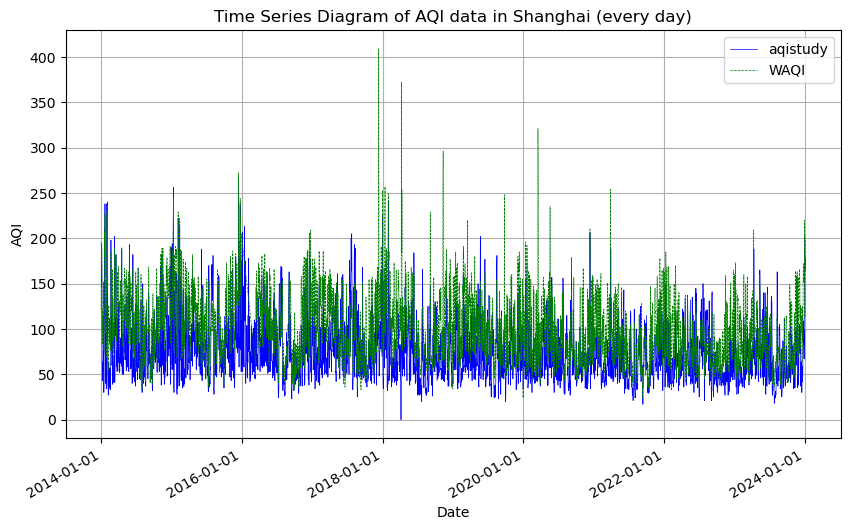

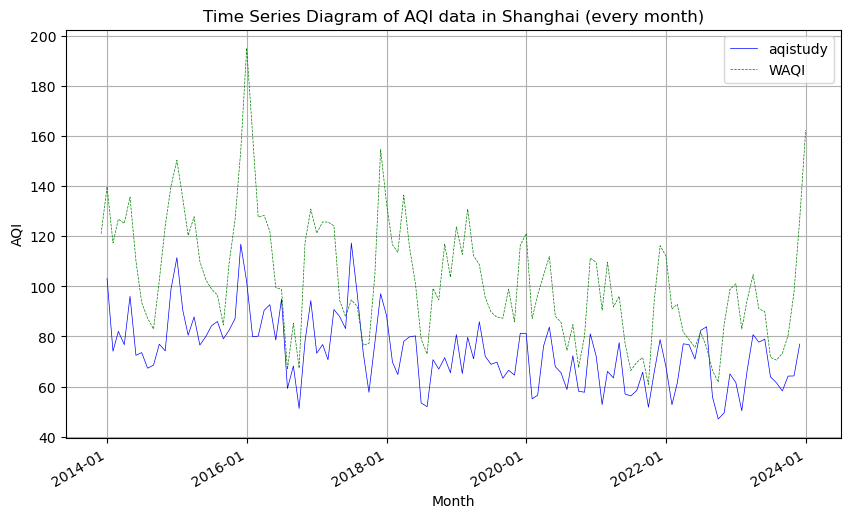

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(df_aqistudy_sh['date'], df_aqistudy_sh['AQI'], linestyle='-', linewidth=0.5, color='b', label='aqistudy')
# plt.plot(df_berkeley_sh['date'], df_berkeley_sh['PM2.5'], linestyle='--', linewidth=0.5, color='r', label='berkeley')
plt.plot(df_aqicn_sh['date'], df_aqicn_sh['AQI'], linestyle='--', linewidth=0.5, color='g', label='WAQI')

plt.xlabel('Date')
plt.ylabel('AQI')
# plt.ylim([0, 300])
plt.title('Time Series Diagram of AQI data in Shanghai (every day)')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(df_aqistudy_sh_m['year_month'], df_aqistudy_sh_m['AQI'], linestyle='-', linewidth=0.5, color='b', label='aqistudy')
# plt.plot(df_berkeley_sh['date'], df_berkeley_sh['PM2.5'], linestyle='--', linewidth=0.5, color='r', label='berkeley')
plt.plot(df_aqicn_sh_m['year_month'], df_aqicn_sh_m['AQI'], linestyle='--', linewidth=0.5, color='g', label='WAQI')

plt.xlabel('Month')
plt.ylabel('AQI')
# plt.ylim([0, 300])
plt.title('Time Series Diagram of AQI data in Shanghai (every month)')
plt.grid()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

Nous pouvons comparer les concentrations de PM2.5 des données de berkeleyearth et de aqistudy:

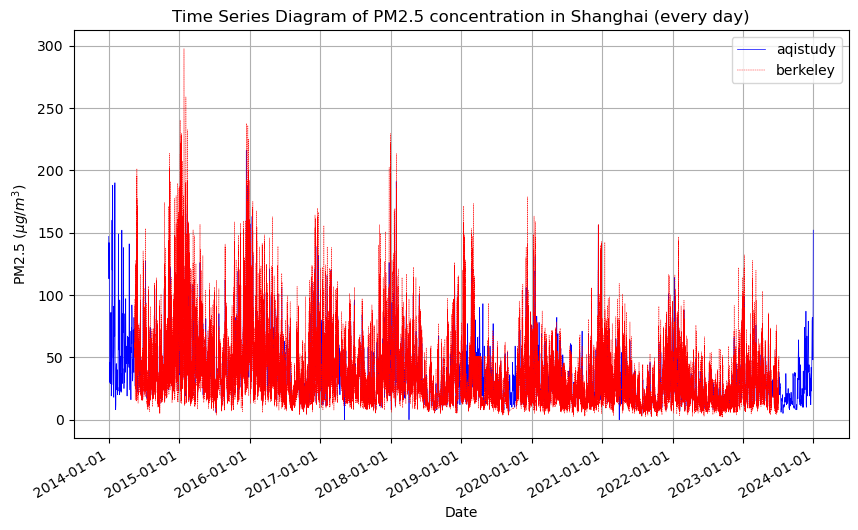

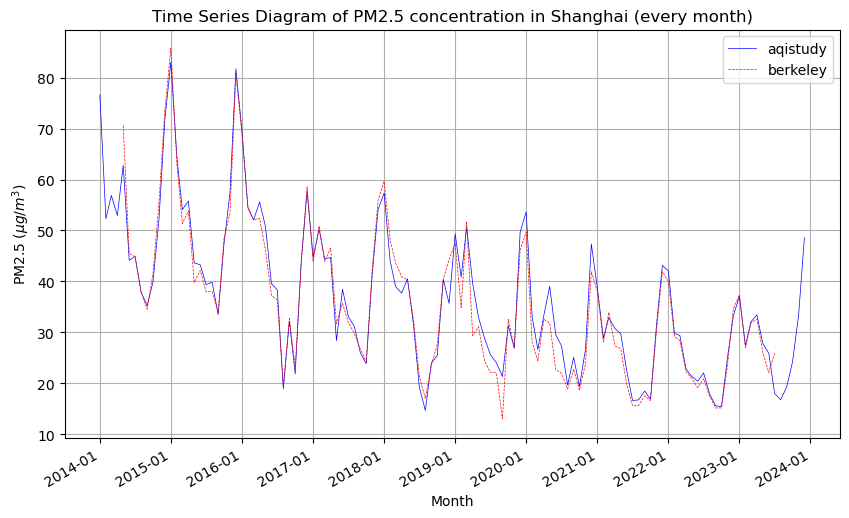

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(df_aqistudy_sh['date'], df_aqistudy_sh['PM2.5'], linestyle='-', linewidth=0.5, color='b', label='aqistudy')
plt.plot(df_berkeley_sh['date'], df_berkeley_sh['PM2.5'], linestyle='--', linewidth=0.3, color='r', label='berkeley')
# plt.plot(df_aqicn_sh['date'], df_aqicn_sh['PM2.5'], linestyle='--', linewidth=0.5, color='g', label='WAQI')

plt.xlabel('Date')
plt.ylabel('PM2.5 ($\mu g/m^3$)')
# plt.ylim([0, 300])
plt.title('Time Series Diagram of PM2.5 concentration in Shanghai (every day)')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(df_aqistudy_sh_m['year_month'], df_aqistudy_sh_m['PM2.5'], linestyle='-', linewidth=0.5, color='b', label='aqistudy')
plt.plot(df_berkeley_sh_m['year_month'], df_berkeley_sh_m['PM2.5'], linestyle='--', linewidth=0.5, color='r', label='berkeley')
# plt.plot(df_aqicn_sh_m['year_month'], df_aqicn_sh_m['PM2.5'], linestyle='--', linewidth=0.5, color='g', label='WAQI')

plt.xlabel('Month')
plt.ylabel('PM2.5 ($\mu g/m^3$)')
# plt.ylim([0, 300])
plt.title('Time Series Diagram of PM2.5 concentration in Shanghai (every month)')
plt.grid()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

Nous pouvons aussi comparer les concentrations de PM2.5 annuelle de WHO, berkeleyearth et aqistudy:

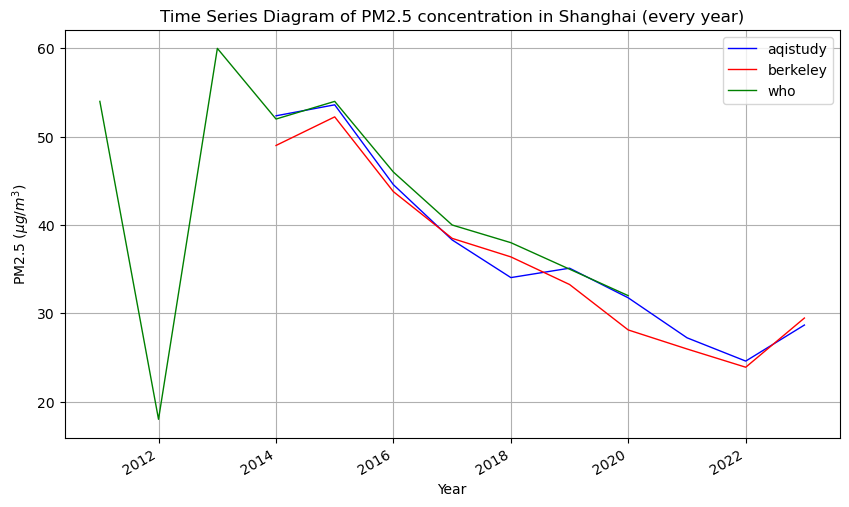

In [118]:
df_who_sh.loc[:,'year'] = pd.to_datetime(df_who_sh['year'], format='%Y')
df_who_sh = df_who_sh.dropna(subset=['pm25_concentration']).sort_values('year')

plt.figure(figsize=(10, 6))

plt.plot(df_aqistudy_sh_y['year'], df_aqistudy_sh_y['PM2.5'], linestyle='-', linewidth=1, color='b', label='aqistudy')
plt.plot(df_berkeley_sh_y['year'], df_berkeley_sh_y['PM2.5'], linestyle='-', linewidth=1, color='r', label='berkeley')
# plt.plot(df_aqicn_sh_m['year_month'], df_aqicn_sh_m['PM2.5'], linestyle='--', linewidth=0.5, color='g', label='WAQI')
plt.plot(df_who_sh['year'], df_who_sh['pm25_concentration'], linestyle='-', linewidth=1, color='g', label='who')

plt.xlabel('Year')
plt.ylabel('PM2.5 ($\mu g/m^3$)')
# plt.ylim([0, 300])
plt.title('Time Series Diagram of PM2.5 concentration in Shanghai (every year)')
plt.grid()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

## 1.3 Données du taux de mortalité maladies respiratoires et problème rencontré
---
- La plupart des pays ne donne que les données anuelles de décès.
- Les données de décès par ville sont souvant inaccessible.
- et ne précise pas la cause de décès.


In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import  expr, split, min, max, stddev, mean, avg,median, col, broadcast, when
from pyspark.sql.types import IntegerType, StringType
spark = SparkSession.builder \
 .master("local[10]") \
 .config("spark.driver.memory", "20g") \
 .appName("air-pollution") \
 .getOrCreate()
spark.conf.set("spark.sql.caseSensitive", "false")


In [197]:
sc = spark.sparkContext

### a) Données de taux de décès maladies respiratoires (src: IHME)

Téléchargement: https://vizhub.healthdata.org/gbd-results/

In [150]:
filepath_IHME = "../data/IHME/IHME-GBD_2019_DATA-d343b043-1.csv"
# df_IHME = pd.read_csv(filepath_IHME)
# df_cols = df_IHME.columns.values
# print(df_cols)
IHMEparsed = spark.read.option("header", "true").csv(filepath_IHME)
# ps_cols = IHMEparsed.columns
# print(ps_cols)
IHMEparsed.show(5)

+-------+-----------------+----+--------+--------------------+-------+----+------------------+--------------------+--------------------+
|measure|         location| sex|     age|               cause| metric|year|               val|               upper|               lower|
+-------+-----------------+----+--------+--------------------+-------+----+------------------+--------------------+--------------------+
| Deaths|           Guyana|Both|All ages|Respiratory infec...|Percent|1990|  0.05751660152114|0.060875075732561616|0.053794338095241014|
| Deaths|           Guyana|Both|All ages|Respiratory infec...|   Rate|1990|48.524773827237134|   54.12308391476895|  42.849050964854754|
| Deaths|    Guinea-Bissau|Both|All ages|Respiratory infec...|Percent|1990|0.1532392311976194|  0.1857518042301856|  0.1288624737097962|
| Deaths|    Guinea-Bissau|Both|All ages|Respiratory infec...|   Rate|1990|260.93392193693967|  326.36381444880226|  209.46886866481836|
| Deaths|Brunei Darussalam|Both|All ages|

In [151]:
IHMEparsed = IHMEparsed.filter(col("metric") == "Rate").select('location', 'cause', 'year', 'val')
IHMEparsed = IHMEparsed.withColumnRenamed("val", "Death Rate")
IHMEparsed.show(5)

+-----------------+--------------------+----+------------------+
|         location|               cause|year|        Death Rate|
+-----------------+--------------------+----+------------------+
|           Guyana|Respiratory infec...|1990|48.524773827237134|
|    Guinea-Bissau|Respiratory infec...|1990|260.93392193693967|
|Brunei Darussalam|Chronic respirato...|1990|28.047355314816443|
|         Honduras|Respiratory infec...|1990| 44.64436203593287|
|           Kuwait|Chronic respirato...|1990|4.6259092778190425|
+-----------------+--------------------+----+------------------+
only showing top 5 rows



In [260]:
IHMEparsed_ri = IHMEparsed.filter(col("cause") == "Respiratory infections and tuberculosis")
IHMEparsed_cr = IHMEparsed.filter(col("cause") == "Chronic respiratory diseases")

In [261]:
IHMEparsed_cr.count()

6120

### b) Données de émise de polluant par pay

Téléchargement: https://ourworldindata.org/explorers/air-pollution

In [34]:
import csv
year_from = 1990
country_alias = {
    "egypt":"egypt, arab rep.",
    "europe":"european union",
    "faeroe islands":"faroe islands",
    "gambia":"gambia, the",
    "french guiana":"guinea",
    "high-income countries":"high income",
    "hong kong":"hong kong sar, china",
    "iran":"iran, islamic rep.",
    "north korea":"korea, dem. people's rep.",
    "south korea":"korea, rep.",
    "laos":"lao pdr",
    "low-income countries":"low income",
    "micronesia (country)":"micronesia, fed. sts.",
    "russia":"russian federation",
    "slovakia":"slovak republic",
    "saint kitts and nevis":"st. kitts and nevis",
    "saint lucia":"st. lucia",
    "syria":"syrian arab republic",
    "timor":"timor-leste",
    "turkey":"turkiye",
    "upper-middle-income countries":"upper middle income",
    "venezuela":"venezuela, rb",
    "vietnam":"viet nam",
    "united states virgin islands":"virgin islands (u.s.)",
    "yemen":"yemen, rep.",
}

In [50]:
df_air_pollution = pd.read_csv("../data/airquality/air-pollution.csv")
df_air_pollution = df_air_pollution[df_air_pollution['Year'].astype(int) >= 1990]
fields_ap = df_air_pollution.columns.values
print(fields_ap)
df_air_pollution

['Nitrogen oxide (NOx)' 'Sulphur dioxide (SO₂)' 'Carbon monoxide (CO)'
 'Organic carbon (OC)' 'NMVOCs' 'Black carbon (BC)' 'Ammonia (NH₃)'
 'Nitrogen oxide (NOx).1' 'Sulphur dioxide (SO₂).1'
 'Carbon monoxide (CO).1' 'Organic carbon (OC).1' 'NMVOCs.1'
 'Black carbon (BC).1' 'Ammonia (NH₃).1' 'Entity' 'Year']


,Nitrogen oxide (NOx),Sulphur dioxide (SO₂),Carbon monoxide (CO),Organic carbon (OC),NMVOCs,Black carbon (BC),Ammonia (NH₃),Nitrogen oxide (NOx).1,Sulphur dioxide (SO₂).1,Carbon monoxide (CO).1,Organic carbon (OC).1,NMVOCs.1,Black carbon (BC).1,Ammonia (NH₃).1,Entity,Year
195,369593.165109,10560.149196,7.660519e+05,21148.920979,324790.071352,6524.425310,75722.096012,29.776338,0.850780,61.717105,1.703867,26.166769,0.525641,6.100564,Afghanistan,1990
196,350497.507709,9881.083158,7.245905e+05,21775.994114,297031.068717,6648.054079,80299.290882,26.355146,0.742994,54.484521,1.637414,22.334816,0.499891,6.037987,Afghanistan,1991
197,224889.350417,5981.234759,4.662375e+05,22343.021367,183132.832872,6514.724062,86201.798012,15.525089,0.412911,32.186403,1.542436,12.642456,0.449740,5.950885,Afghanistan,1992
198,222415.282316,5894.177473,4.633083e+05,23349.443296,177369.007446,6739.386545,92924.370095,14.062142,0.372658,29.292532,1.476262,11.214104,0.426096,5.875116,Afghanistan,1993
199,222376.597095,6251.537337,4.836455e+05,24295.073299,181305.074648,7037.784596,99621.739384,13.022964,0.366107,28.323565,1.422784,10.617707,0.412151,5.834114,Afghanistan,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47530,83842.096401,67231.291799,1.610636e+06,108275.483442,299713.466501,30912.239774,112425.840095,6.069075,4.866669,116.589083,7.837734,21.695348,2.237643,8.138165,Zimbabwe,2015
47531,76234.430113,59452.695878,1.632515e+06,111975.723799,302718.315314,31570.526454,115539.979134,5.433542,4.237439,116.356079,7.980971,21.575982,2.250162,8.235010,Zimbabwe,2016
47532,74381.797266,53891.385836,1.657689e+06,114613.199492,306905.624759,32344.405320,118254.660089,5.224689,3.785412,116.438520,8.050602,21.557510,2.271919,8.306384,Zimbabwe,2017
47533,73062.525071,51072.778332,1.653665e+06,114583.507408,306860.211088,32365.562573,119965.763390,5.060148,3.537187,114.529137,7.935799,21.252456,2.241567,8.308562,Zimbabwe,2018


In [148]:
lst_structField_ap = []
for field in fields_ap:
    if field == "Entity" or field == "Year":
        lst_structField_ap.append(StructField(field, StringType(), False))
    else:
        lst_structField_ap.append(StructField(field, DoubleType(), True))
schema_ap = StructType(lst_structField_ap)
parsed_ap = spark.read.option("header", "true").schema(schema_ap).csv("../data/airquality/air-pollution.csv")
# parsed_ap.count()
parsed_ap = parsed_ap.filter(col("Year") >=1990)
parsed_ap.count()
parsed_ap.show(5)

+--------------------+---------------------+--------------------+-------------------+------------------+------------------+-----------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+-----------------+-----------+----+
|Nitrogen oxide (NOx)|Sulphur dioxide (SO₂)|Carbon monoxide (CO)|Organic carbon (OC)|            NMVOCs| Black carbon (BC)|    Ammonia (NH₃)|Nitrogen oxide (NOx).1|Sulphur dioxide (SO₂).1|Carbon monoxide (CO).1|Organic carbon (OC).1|          NMVOCs.1|Black carbon (BC).1|  Ammonia (NH₃).1|     Entity|Year|
+--------------------+---------------------+--------------------+-------------------+------------------+------------------+-----------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+-----------------+-----------+----+
|    369593.165109308|     10560.1491957337|   766051.9024026981|   21148.92

### c) Données de population, surface, GDP par pays (src: The World Bank)
- World Development Indicators (WDI) téléchargement: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

In [85]:
df_wdi = pd.read_csv("../data/WDI_CSV/WDIData.csv")
selected_indicators = {
    "NY.GDP.MKTP.CD": "GDP",              # GDP
    "EN.ATM.PM25.MC.M3": "PM2.5",         # PM2.5
    "SP.POP.TOTL": "Population",          # Population, total
    "AG.SRF.TOTL.K2": "Surface",          # Surface area (sq. km)	
}
df_wdi.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'], dtype=object)

In [336]:
df_wdi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395271,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395272,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN,NaN,NaN
395273,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN,NaN,NaN
395274,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.400000,59.500000,59.700000,59.900000,60.100000,60.300000,60.500000,60.700000,NaN,NaN


In [118]:
selected_columns = ['Country Name', 'Country Code', 'Indicator Code'] + [str(year) for year in range(1990, 2023)]
df_wdi_selected = df_wdi[df_wdi['Indicator Code'].isin(list(selected_indicators.keys()))]
df_wdi_selected = df_wdi_selected[selected_columns]
# [df_wdi['Indicator Name'].isin(list(selected_indicators.keys()))]
df_pivoted = df_wdi_selected.pivot(index=['Country Name', 'Country Code'], columns=['Indicator Code'] )
df_pivoted.reset_index(inplace=True)
df_pivoted

Country Name Country Code           1990  \
Indicator Code                                           AG.SRF.TOTL.K2   
0                               Afghanistan          AFG   6.528600e+05   
1               Africa Eastern and Southern          AFE   1.510674e+07   
2                Africa Western and Central          AFW   9.166270e+06   
3                                   Albania          ALB   2.875000e+04   
4                                   Algeria          DZA   2.381740e+06   
..                                      ...          ...            ...   
261                      West Bank and Gaza          PSE   6.020000e+03   
262                                   World          WLD   1.339735e+08   
263                             Yemen, Rep.          YEM   5.279700e+05   
264                                  Zambia          ZMB   7.526100e+05   
265                                Zimbabwe          ZWE   3.907600e+05   

                                                                        1991  \
Indicator Code EN.ATM.PM25.MC.M3 NY.GDP.MKTP.CD   SP.POP.TOTL AG.SRF.TOTL.K2   
0                      49.282398            NaN  1.069480e+07   6.528600e+05   
1                      30.132449   2.546735e+11  3.098907e+08   1.510674e+07   
2                      64.258847   1.218036e+11  2.067390e+08   9.166270e+06   
3                      24.947482   2.028554e+09  3.286542e+06   2.875000e+04   
4                      30.068900   6.204851e+10  2.551807e+07   2.381740e+06   
..                           ...            ...           ...            ...   
261                    30.043128            NaN  1.978248e+06   6.020000e+03   
262                    40.860853   2.293504e+13  5.293395e+09   1.339736e+08   
263                    47.262359   1.264382e+10  1.337512e+07   5.279700e+05   
264                    26.123078   3.285217e+09  7.686401e+06   7.526100e+05   
265                    24.227920   8.783817e+09  1.011389e+07   3.907600e+05   

                                                               ...  \
Indicator Code EN.ATM.PM25.MC.M3 NY.GDP.MKTP.CD   SP.POP.TOTL  ...   
0                            NaN            NaN  1.074517e+07  ...   
1                            NaN   2.756220e+11  3.185441e+08  ...   
2                            NaN   1.279390e+11  2.121729e+08  ...   
3                            NaN   1.099559e+09  3.266790e+06  ...   
4                            NaN   4.571568e+10  2.613390e+07  ...   
..                           ...            ...           ...  ...   
261                          NaN            NaN  2.068845e+06  ...   
262                          NaN   2.393251e+13  5.382537e+09  ...   
263                          NaN   1.466545e+10  1.389585e+07  ...   
264                          NaN   3.376791e+09  7.880466e+06  ...   
265                          NaN   8.641482e+09  1.037782e+07  ...   

                         2020                         2021                    \
Indicator Code NY.GDP.MKTP.CD   SP.POP.TOTL AG.SRF.TOTL.K2 EN.ATM.PM25.MC.M3   
0                1.995593e+10  3.897223e+07   6.528600e+05               NaN   
1                9.288802e+11  6.851130e+08   1.516201e+07               NaN   
2                7.869624e+11  4.661891e+08   9.166260e+06               NaN   
3                1.516273e+10  2.837849e+06   2.875000e+04               NaN   
4                1.457435e+11  4.345167e+07   2.381741e+06               NaN   
..                        ...           ...            ...               ...   
261              1.553170e+10  4.803269e+06   6.025000e+03               NaN   
262              8.525774e+13  7.820206e+09   1.404869e+08               NaN   
263                       NaN  3.228405e+07   5.279700e+05               NaN   
264              1.811064e+10  1.892772e+07   7.526100e+05               NaN   
265              2.150970e+10  1.566967e+07   3.907600e+05               NaN   

                                                      2022    

In [131]:
df_stacked = df_pivoted.set_index(['Country Name', 'Country Code']).stack(level=0).reset_index()
df_stacked

Indicator Code,Country Name,Country Code,level_2,AG.SRF.TOTL.K2,EN.ATM.PM25.MC.M3,NY.GDP.MKTP.CD,SP.POP.TOTL
0,Afghanistan,AFG,1990,652860.0,49.282398,NaN,10694796.0
1,Afghanistan,AFG,1991,652860.0,NaN,NaN,10745167.0
2,Afghanistan,AFG,1992,652860.0,NaN,NaN,12057433.0
3,Afghanistan,AFG,1993,652860.0,NaN,NaN,14003760.0
4,Afghanistan,AFG,1994,652860.0,NaN,NaN,15455555.0
...,...,...,...,...,...,...,...
8740,Zimbabwe,ZWE,2018,390760.0,22.085555,3.415607e+10,15052184.0
8741,Zimbabwe,ZWE,2019,390760.0,20.834700,2.183223e+10,15354608.0
8742,Zimbabwe,ZWE,2020,390760.0,NaN,2.150970e+10,15669666.0
8743,Zimbabwe,ZWE,2021,390760.0,NaN,2.837124e+10,15993524.0


In [144]:
df_wdi_filtered = df_stacked.rename(columns=selected_indicators)\
.rename(columns={"level_2": "Year", "Country Name":"Entity", "Country Code":"Code"})
df_wdi_filtered.to_csv("../data/WDI_CSV/WDIDataFiltered.csv")
fields_wdi = df_wdi_filtered.columns.values
print(fields_wdi)
df_wdi_filtered

['Entity' 'Code' 'Year' 'Surface' 'PM2.5' 'GDP' 'Population']


Indicator Code,Entity,Code,Year,Surface,PM2.5,GDP,Population
0,Afghanistan,AFG,1990,652860.0,49.282398,NaN,10694796.0
1,Afghanistan,AFG,1991,652860.0,NaN,NaN,10745167.0
2,Afghanistan,AFG,1992,652860.0,NaN,NaN,12057433.0
3,Afghanistan,AFG,1993,652860.0,NaN,NaN,14003760.0
4,Afghanistan,AFG,1994,652860.0,NaN,NaN,15455555.0
...,...,...,...,...,...,...,...
8740,Zimbabwe,ZWE,2018,390760.0,22.085555,3.415607e+10,15052184.0
8741,Zimbabwe,ZWE,2019,390760.0,20.834700,2.183223e+10,15354608.0
8742,Zimbabwe,ZWE,2020,390760.0,NaN,2.150970e+10,15669666.0
8743,Zimbabwe,ZWE,2021,390760.0,NaN,2.837124e+10,15993524.0


In [146]:
lst_structField_wdi = [StructField("Index", StringType(), False)]
for field in fields_wdi:
    if field == "Entity" or field == "Year" or field == "Code":
        lst_structField_wdi.append(StructField(field, StringType(), False))
    else:
        lst_structField_wdi.append(StructField(field, DoubleType(), True))
schema_wdi = StructType(lst_structField_wdi)
parsed_wdi = spark.read.option("header", "true").schema(schema_wdi).csv("../data/WDI_CSV/WDIDataFiltered.csv").drop("Index")

print(parsed_wdi.columns)
parsed_wdi.show(5)


['Entity', 'Code', 'Year', 'Surface', 'PM2.5', 'GDP', 'Population']
+-----------+----+----+--------+-----------+----+-----------+
|     Entity|Code|Year| Surface|      PM2.5| GDP| Population|
+-----------+----+----+--------+-----------+----+-----------+
|Afghanistan| AFG|1990|652860.0|49.28239771|NULL|1.0694796E7|
|Afghanistan| AFG|1991|652860.0|       NULL|NULL|1.0745167E7|
|Afghanistan| AFG|1992|652860.0|       NULL|NULL|1.2057433E7|
|Afghanistan| AFG|1993|652860.0|       NULL|NULL| 1.400376E7|
|Afghanistan| AFG|1994|652860.0|       NULL|NULL|1.5455555E7|
+-----------+----+----+--------+-----------+----+-----------+
only showing top 5 rows



# Partie 2. Analyse de données

## 2.1 join

In [262]:
fields_air = df_air_pollution.columns.values
fields_air

# datafile ="../data/airquality/air-pollution.csv"
# lst_structField_air = []
# for field in fields_air:
#     if field == "Entity" or field == "Year" or field == "Code":
#         lst_structField_air.append(StructField(field, StringType(), False))
#     else:
#         lst_structField_air.append(StructField(field, DoubleType(), True))
# schema_air = StructType(lst_structField_air)
# parsed_air = spark.read.option("header", "true").schema(schema_wdi).csv(datafile)
parsed_air = spark.createDataFrame(df_air_pollution)
parsed_air.show(5)
parsed_air.createOrReplaceTempView("pollutions");
# print(parsed_air.columns)
# parsed_air.show(5)

IHMEparsed_ri.createOrReplaceTempView('IHMEparsed_ri')
IHMEparsed_ri.show(4)
IHMEparsed_cr.createOrReplaceTempView('IHMEparsed_cr')
IHMEparsed_cr.show(4)


+--------------------+---------------------+--------------------+-------------------+------------------+------------------+-----------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+-----------------+-----------+----+
|Nitrogen oxide (NOx)|Sulphur dioxide (SO₂)|Carbon monoxide (CO)|Organic carbon (OC)|            NMVOCs| Black carbon (BC)|    Ammonia (NH₃)|Nitrogen oxide (NOx).1|Sulphur dioxide (SO₂).1|Carbon monoxide (CO).1|Organic carbon (OC).1|          NMVOCs.1|Black carbon (BC).1|  Ammonia (NH₃).1|     Entity|Year|
+--------------------+---------------------+--------------------+-------------------+------------------+------------------+-----------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+-----------------+-----------+----+
|    369593.165109308|     10560.1491957337|   766051.9024026981|   21148.92

In [263]:
merged_ri_x = spark.sql(""" SELECT distinct a.*, b.cause, b.`Death Rate`
FROM pollutions a INNER JOIN IHMEparsed_ri b ON ((lower(a.Entity) = lower(b.Location)) AND (a.Year = b.Year))
""")
merged_ri_x.createOrReplaceTempView("merged_ri_x")
merged_ri_x.show(5)

+--------------------+---------------------+--------------------+-------------------+------------------+------------------+------------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+------------------+-------------------+----+--------------------+------------------+
|Nitrogen oxide (NOx)|Sulphur dioxide (SO₂)|Carbon monoxide (CO)|Organic carbon (OC)|            NMVOCs| Black carbon (BC)|     Ammonia (NH₃)|Nitrogen oxide (NOx).1|Sulphur dioxide (SO₂).1|Carbon monoxide (CO).1|Organic carbon (OC).1|          NMVOCs.1|Black carbon (BC).1|   Ammonia (NH₃).1|             Entity|Year|               cause|        Death Rate|
+--------------------+---------------------+--------------------+-------------------+------------------+------------------+------------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+-----------

In [264]:
merged_cr_x = spark.sql(""" SELECT distinct a.*, b.cause, b.`Death Rate`
FROM pollutions a INNER JOIN IHMEparsed_cr b ON ((lower(a.Entity) = lower(b.Location)) AND (a.Year = b.Year))
""")
merged_cr_x.createOrReplaceTempView("merged_cr_x")
merged_cr_x.show(5)

+--------------------+---------------------+--------------------+-------------------+----------------+-----------------+----------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+------------------+-------------------+----+--------------------+------------------+
|Nitrogen oxide (NOx)|Sulphur dioxide (SO₂)|Carbon monoxide (CO)|Organic carbon (OC)|          NMVOCs|Black carbon (BC)|   Ammonia (NH₃)|Nitrogen oxide (NOx).1|Sulphur dioxide (SO₂).1|Carbon monoxide (CO).1|Organic carbon (OC).1|          NMVOCs.1|Black carbon (BC).1|   Ammonia (NH₃).1|             Entity|Year|               cause|        Death Rate|
+--------------------+---------------------+--------------------+-------------------+----------------+-----------------+----------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+------------------+-------

In [265]:
parsed_wdi = spark.createDataFrame(df_wdi_filtered)
parsed_wdi.createOrReplaceTempView("wdidata")
parsed_wdi.show(5)

+-----------+----+----+--------+-----------+---+-----------+
|     Entity|Code|Year| Surface|      PM2.5|GDP| Population|
+-----------+----+----+--------+-----------+---+-----------+
|Afghanistan| AFG|1990|652860.0|49.28239771|NaN|1.0694796E7|
|Afghanistan| AFG|1991|652860.0|        NaN|NaN|1.0745167E7|
|Afghanistan| AFG|1992|652860.0|        NaN|NaN|1.2057433E7|
|Afghanistan| AFG|1993|652860.0|        NaN|NaN| 1.400376E7|
|Afghanistan| AFG|1994|652860.0|        NaN|NaN|1.5455555E7|
+-----------+----+----+--------+-----------+---+-----------+
only showing top 5 rows



In [266]:
merged_ri = spark.sql(""" SELECT distinct a.GDP, a.Surface, a.`PM2.5`, a.Population, b.*
FROM wdidata a INNER JOIN merged_ri_x b ON ((lower(a.Entity) = lower(b.Entity)) AND (a.Year = b.Year))
""")
merged_ri.createOrReplaceTempView("merged_ri")
merged_ri.show(5)


+------------------+---------+-----------+-----------+--------------------+---------------------+--------------------+-------------------+------------------+------------------+------------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+------------------+-------------------+----+--------------------+------------------+
|               GDP|  Surface|      PM2.5| Population|Nitrogen oxide (NOx)|Sulphur dioxide (SO₂)|Carbon monoxide (CO)|Organic carbon (OC)|            NMVOCs| Black carbon (BC)|     Ammonia (NH₃)|Nitrogen oxide (NOx).1|Sulphur dioxide (SO₂).1|Carbon monoxide (CO).1|Organic carbon (OC).1|          NMVOCs.1|Black carbon (BC).1|   Ammonia (NH₃).1|             Entity|Year|               cause|        Death Rate|
+------------------+---------+-----------+-----------+--------------------+---------------------+--------------------+-------------------+------------------+------------------+--

In [267]:
merged_cr = spark.sql(""" SELECT distinct a.GDP, a.Surface, a.`PM2.5`, a.Population, b.*
FROM wdidata a INNER JOIN merged_cr_x b ON ((lower(a.Entity) = lower(b.Entity)) AND (a.Year = b.Year))
""")
merged_cr.createOrReplaceTempView("merged_cr")
merged_cr.show(5)


+-------------------+---------+-----------+-----------+--------------------+---------------------+--------------------+-------------------+----------------+-----------------+----------------+----------------------+-----------------------+----------------------+---------------------+------------------+-------------------+------------------+-------------------+----+--------------------+------------------+
|                GDP|  Surface|      PM2.5| Population|Nitrogen oxide (NOx)|Sulphur dioxide (SO₂)|Carbon monoxide (CO)|Organic carbon (OC)|          NMVOCs|Black carbon (BC)|   Ammonia (NH₃)|Nitrogen oxide (NOx).1|Sulphur dioxide (SO₂).1|Carbon monoxide (CO).1|Organic carbon (OC).1|          NMVOCs.1|Black carbon (BC).1|   Ammonia (NH₃).1|             Entity|Year|               cause|        Death Rate|
+-------------------+---------+-----------+-----------+--------------------+---------------------+--------------------+-------------------+----------------+-----------------+------------

In [277]:
merged_cr.columns

['GDP',
 'Surface',
 'PM2.5',
 'Population',
 'Nitrogen oxide (NOx)',
 'Sulphur dioxide (SO₂)',
 'Carbon monoxide (CO)',
 'Organic carbon (OC)',
 'NMVOCs',
 'Black carbon (BC)',
 'Ammonia (NH₃)',
 'Nitrogen oxide (NOx).1',
 'Sulphur dioxide (SO₂).1',
 'Carbon monoxide (CO).1',
 'Organic carbon (OC).1',
 'NMVOCs.1',
 'Black carbon (BC).1',
 'Ammonia (NH₃).1',
 'Entity',
 'Year',
 'cause',
 'Death Rate']

## 2.2 Analyse

In [281]:
df_cr = merged_cr.toPandas().drop(columns=['Entity', 'Year','cause'])
df_cr['Death Rate'] = pd.to_numeric(df_cr['Death Rate'])
df_ri = merged_ri.toPandas().drop(columns=['Entity', 'Year','cause'])
df_ri['Death Rate'] = pd.to_numeric(df_ri['Death Rate'])

In [339]:
import numpy as np
import matplotlib.patches as mpatches

from matplotlib import colors as mcolors
from pyspark.sql.functions import  expr, split, min, max, stddev, mean, avg,median, col, broadcast, when, lower

indicators = [
    "Nitrogen oxide (NOx)",	"Sulphur dioxide (SO₂)",	
    "Carbon monoxide (CO)",	"Organic carbon (OC)",
    "NMVOCs",	"Black carbon (BC)",	"Ammonia (NH₃)",
    "GDP", "PM2.5"
  ]

def draw_pigure(title):
    fig = plt.figure(constrained_layout=True)
    colors = list(mcolors.TABLEAU_COLORS.values())
    
    fig, axs = plt.subplots(3,3, figsize=(12, 8))
    plt.subplots_adjust(bottom=0.2, top=0.95, hspace=0.5)
    m=0
    n=0
    labels = {}
    for indicator in indicators:
        xx = selected_merged_p.toPandas()[[indicator, 'Death Rate', 'Entity']].dropna()
        l = xx.values.tolist()
        x = [x[0] for x in l]
        y = [float(x[1]) for x in l]
        last = ''
        c = []
        k = 0
        for i, a in enumerate([x[2] for x in l]):
            if last != a:
                k += 1
                last = a
                labels[a] = colors[k%len(colors)]
            c.append(colors[k%len(colors)])
    
        axs[m,n].scatter(x, y, alpha=0.5, c=c)
        axs[m,n].set(xlabel=indicator, ylabel="Death Rate")

        m += 1
        if m > 2:
            m = 0
            n += 1
    
    
    handles = []
    for label, color in labels.items():
        handles.append(mpatches.Patch(color=color, label=label))
    fig.legend(handles=handles, bbox_to_anchor=(1,0.96))
    
    plt.suptitle(title, fontsize=14)
    plt.savefig("../fig/"+title+".png")
    plt.show()


In [283]:
# selected_countries = ['poland', 'pakistan', 'france', 'japan']
selected_countries = ['poland', 'japan', 'pakistan', 'italy', 'france', 'south africa', 'argentina', 'spain', 'canada', 'greece']

<Figure size 640x480 with 0 Axes>

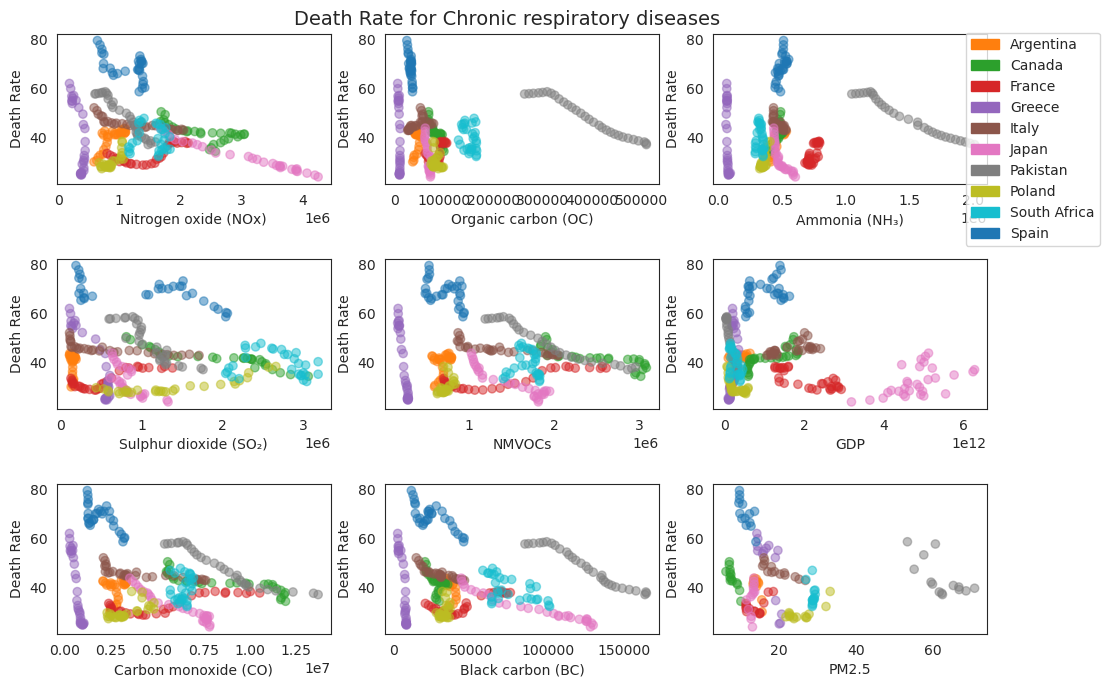

In [340]:
selected_merged_p = merged_cr.filter(lower(merged_cr["Entity"]).isin(selected_countries)).sort('Entity')
selected_merged_p.count()
draw_pigure("Death Rate for Chronic respiratory diseases")

<Figure size 640x480 with 0 Axes>

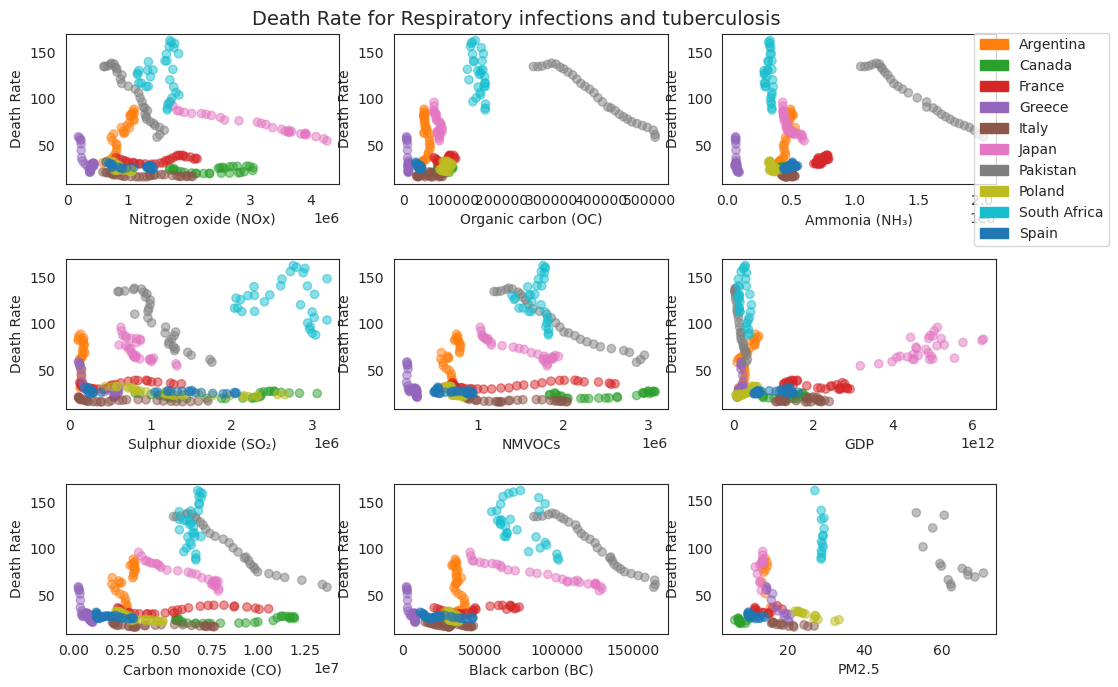

In [341]:
selected_merged_p = merged_ri.filter(lower(merged_ri["Entity"]).isin(selected_countries)).sort('Entity')
selected_merged_p.count()
draw_pigure("Death Rate for Respiratory infections and tuberculosis")

In [354]:
import numpy as np
def draw_dcorr(data, title):
    dcorr = data.corr(method='pearson')
    plt.figure(figsize=(11, 9),dpi=100)
    cmap = 'RdBu'
    cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
    plt.title(title)
    sns.heatmap(data=dcorr,
                annot=True,#图中数字文本显示
                fmt=".2f",#格式化输出图中数字，即保留小数位数等
                annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
                mask=np.triu(np.ones_like(dcorr,dtype=np.bool_)),
                cmap = cmap
               )
    plt.savefig("../fig/dcorr_"+title+".png")
    # sns.clustermap(data=dcorr,
    #                vmax=0.7,
    #                cmap=cmap,
    #                linewidths=.75,       
                                  
    #               )
def draw_corr_cluster(data, title):
    dcorr = data.corr(method='pearson')
    plt.figure(figsize=(11, 9),dpi=100)
    cmap = 'RdBu'
    cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
    rel = sns.clustermap(data=dcorr,
                   vmax=0.7,
                   cmap=cmap,
                   linewidths=.75,
                  )
    # rel.fig.suptitle(title)

    plt.savefig("../fig/corrCluster_"+title+".png")

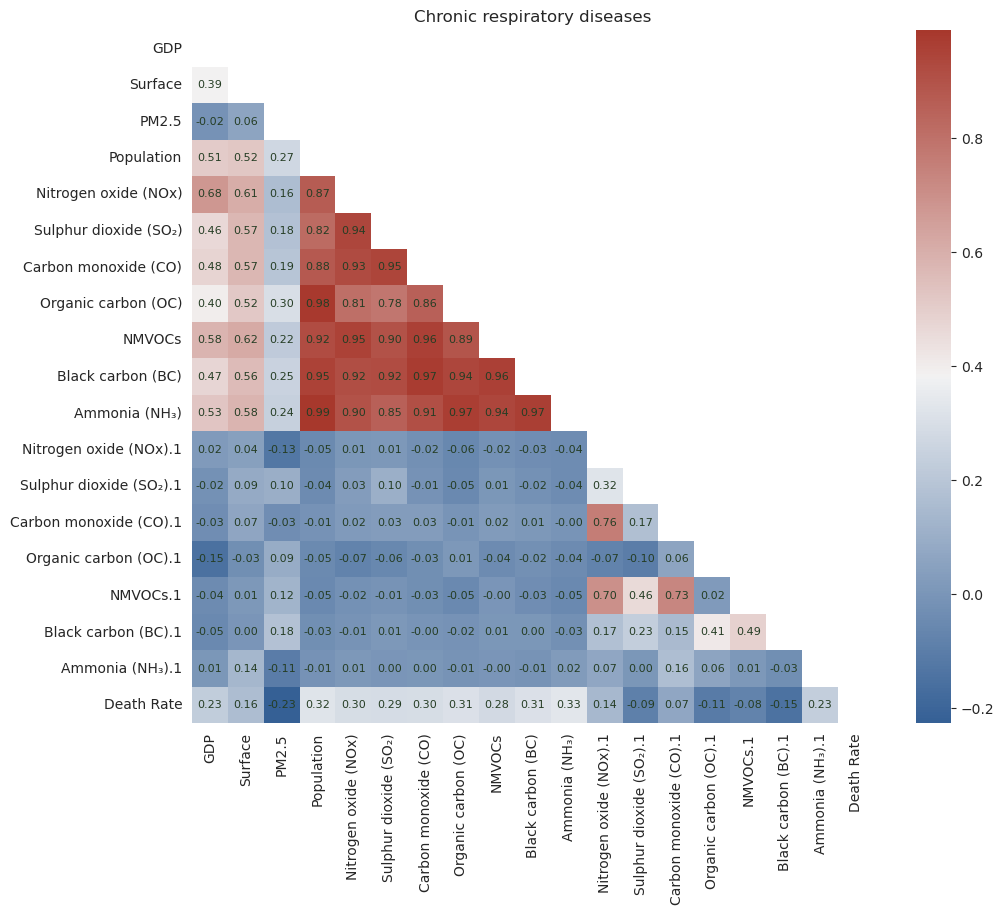

In [343]:
draw_dcorr(df_cr, "Chronic respiratory diseases")

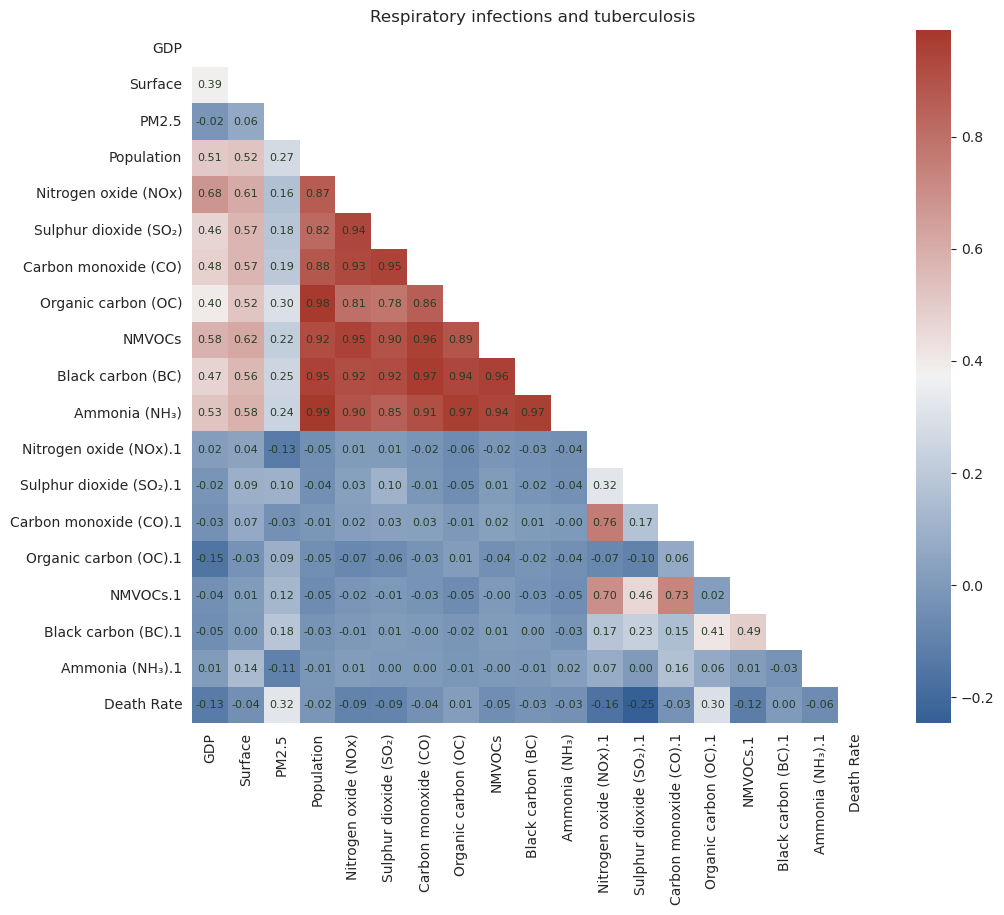

In [344]:
draw_dcorr(df_ri, "Respiratory infections and tuberculosis")

<Figure size 1100x900 with 0 Axes>

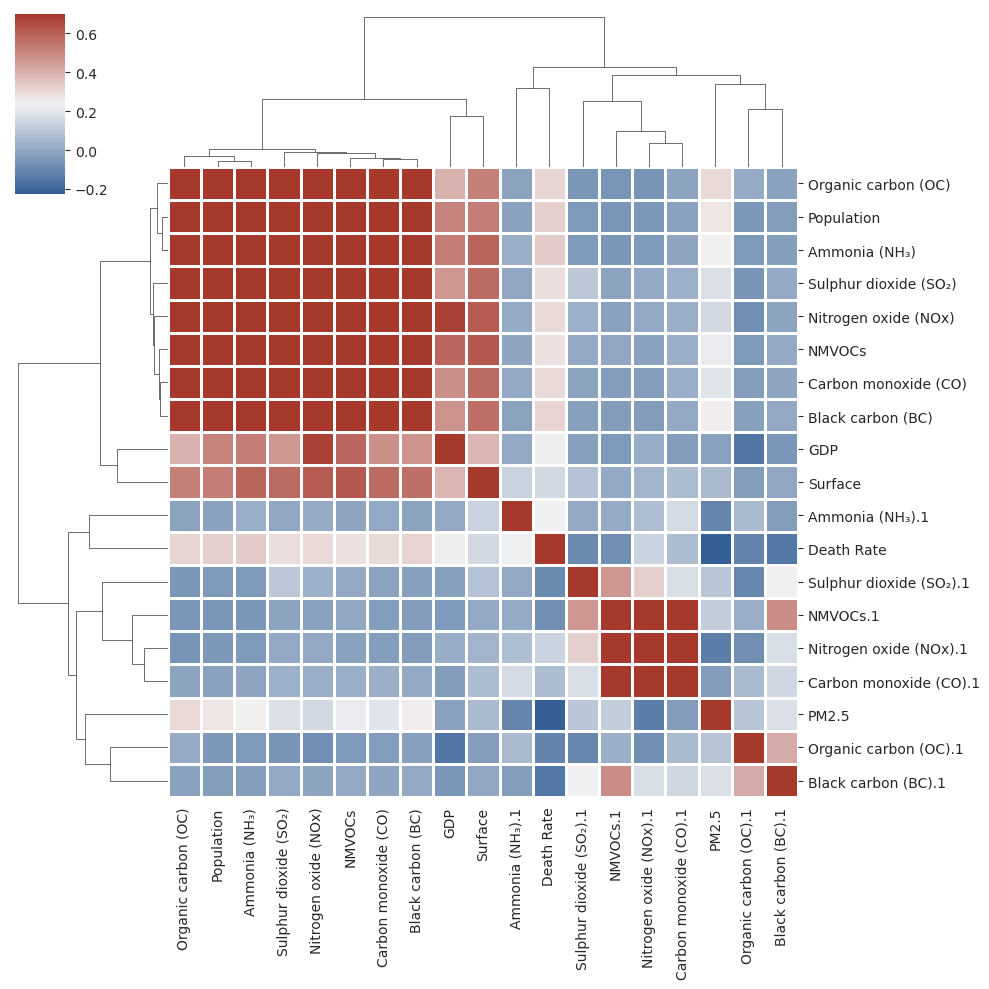

In [355]:
draw_corr_cluster(df_cr, "Chronic respiratory diseases")

<Figure size 1100x900 with 0 Axes>

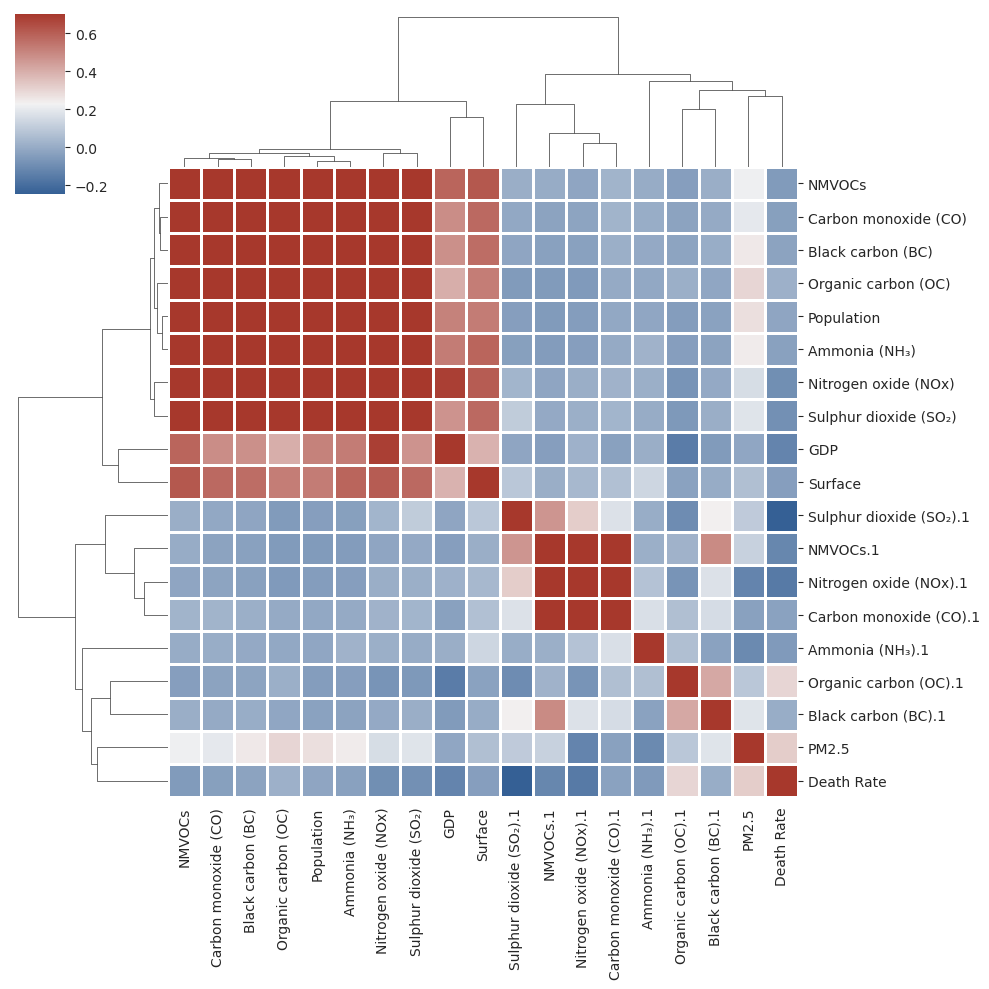

In [356]:
draw_corr_cluster(df_ri, "Respiratory infections and tuberculosis")

# Partie 3 Machine Learning

In [315]:
!pip install seaborn
!pip install xgboost


In [307]:
print("cr:\n---------\n", df_cr.isna().mean())
print("ri:\n---------\n", df_ri.isna().mean())

cr:
---------
 GDP                        0.036196
Surface                    0.007157
PM2.5                      0.533333
Population                 0.000000
Nitrogen oxide (NOx)       0.000000
Sulphur dioxide (SO₂)      0.000000
Carbon monoxide (CO)       0.000000
Organic carbon (OC)        0.000000
NMVOCs                     0.000000
Black carbon (BC)          0.000000
Ammonia (NH₃)              0.000000
Nitrogen oxide (NOx).1     0.000000
Sulphur dioxide (SO₂).1    0.000000
Carbon monoxide (CO).1     0.000000
Organic carbon (OC).1      0.000000
NMVOCs.1                   0.000000
Black carbon (BC).1        0.000000
Ammonia (NH₃).1            0.000000
Death Rate                 0.000000
dtype: float64
ri:
---------
 GDP                        0.036196
Surface                    0.007157
PM2.5                      0.533333
Population                 0.000000
Nitrogen oxide (NOx)       0.000000
Sulphur dioxide (SO₂)      0.000000
Carbon monoxide (CO)       0.000000
Organic carbon (OC)

<Axes: >

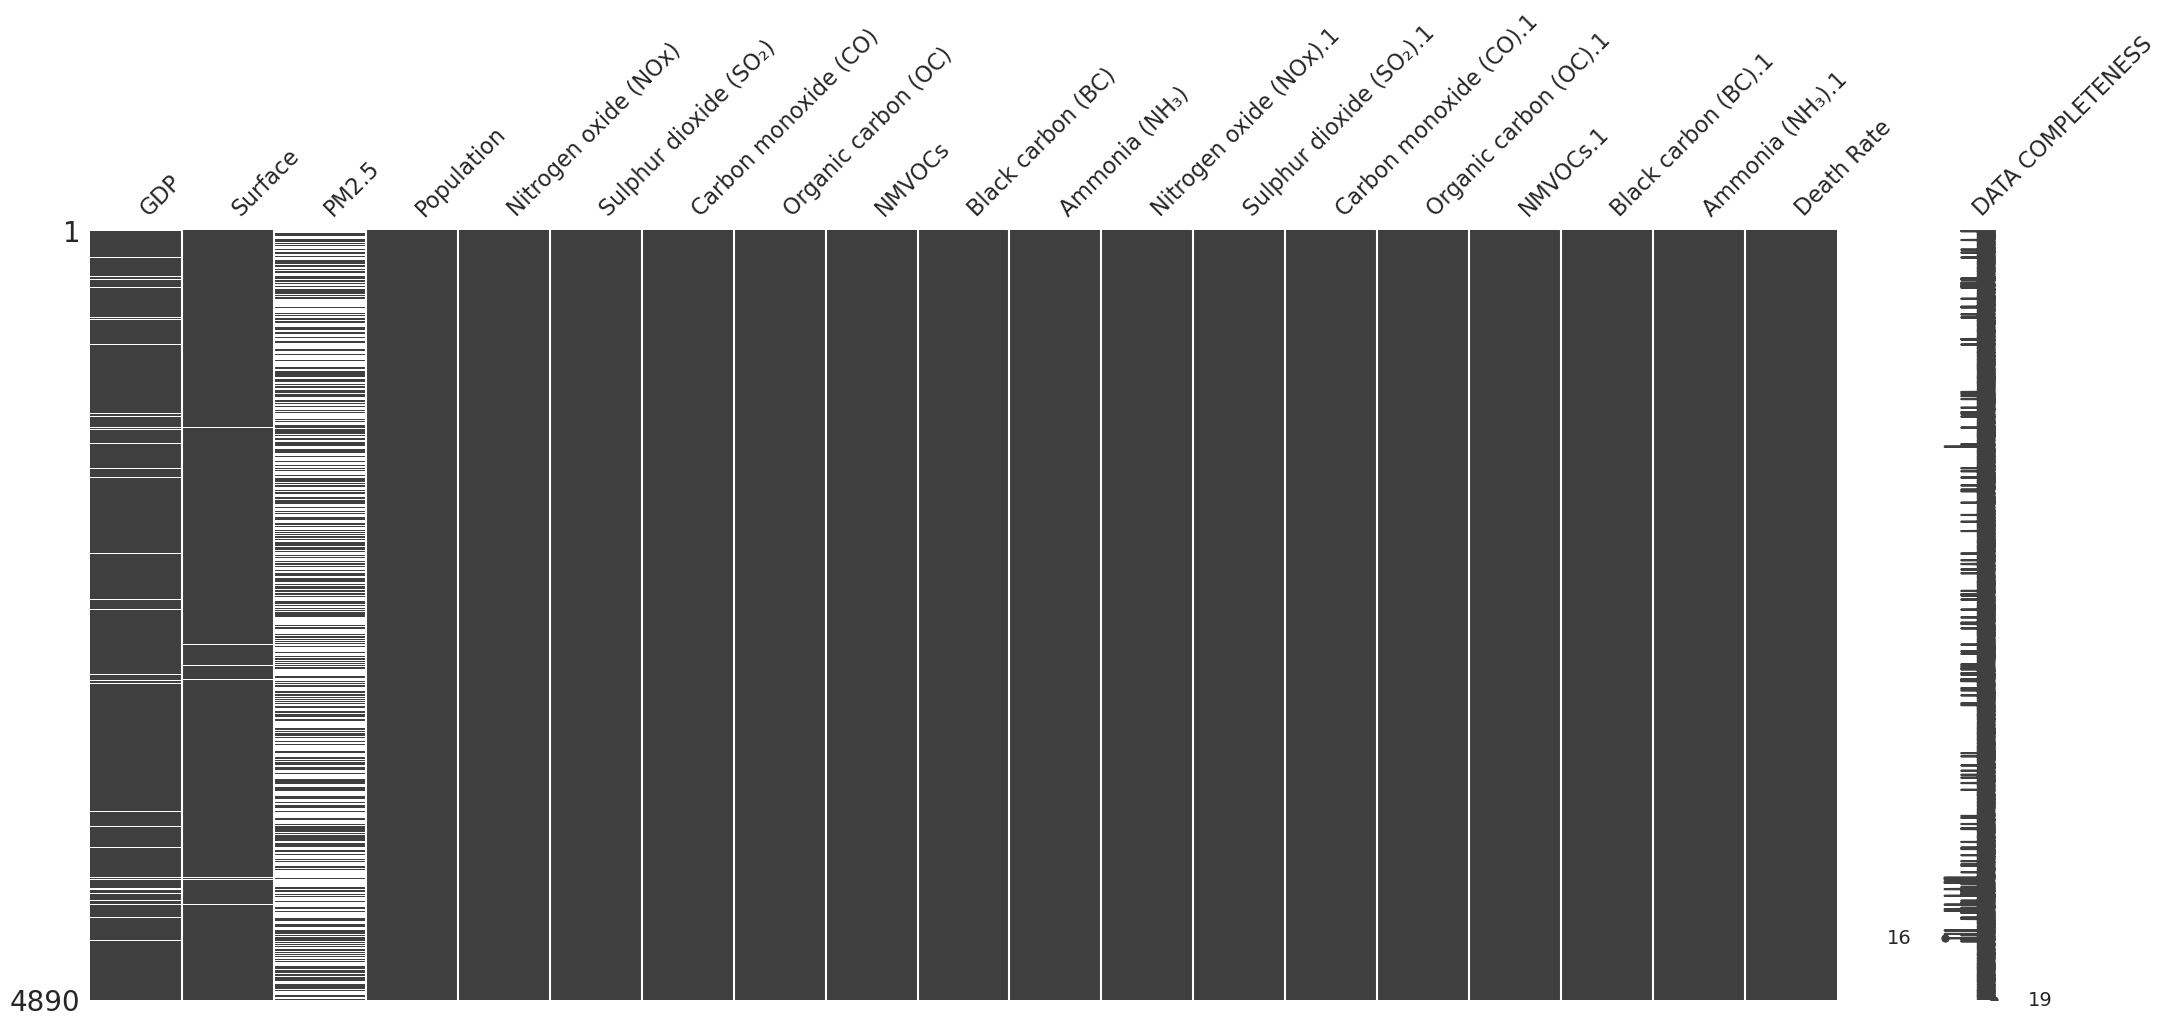

In [313]:
import missingno as msno
msno.matrix(df_cr.dropna(subset=['Death Rate'], how='any'), labels=True)

<Axes: >

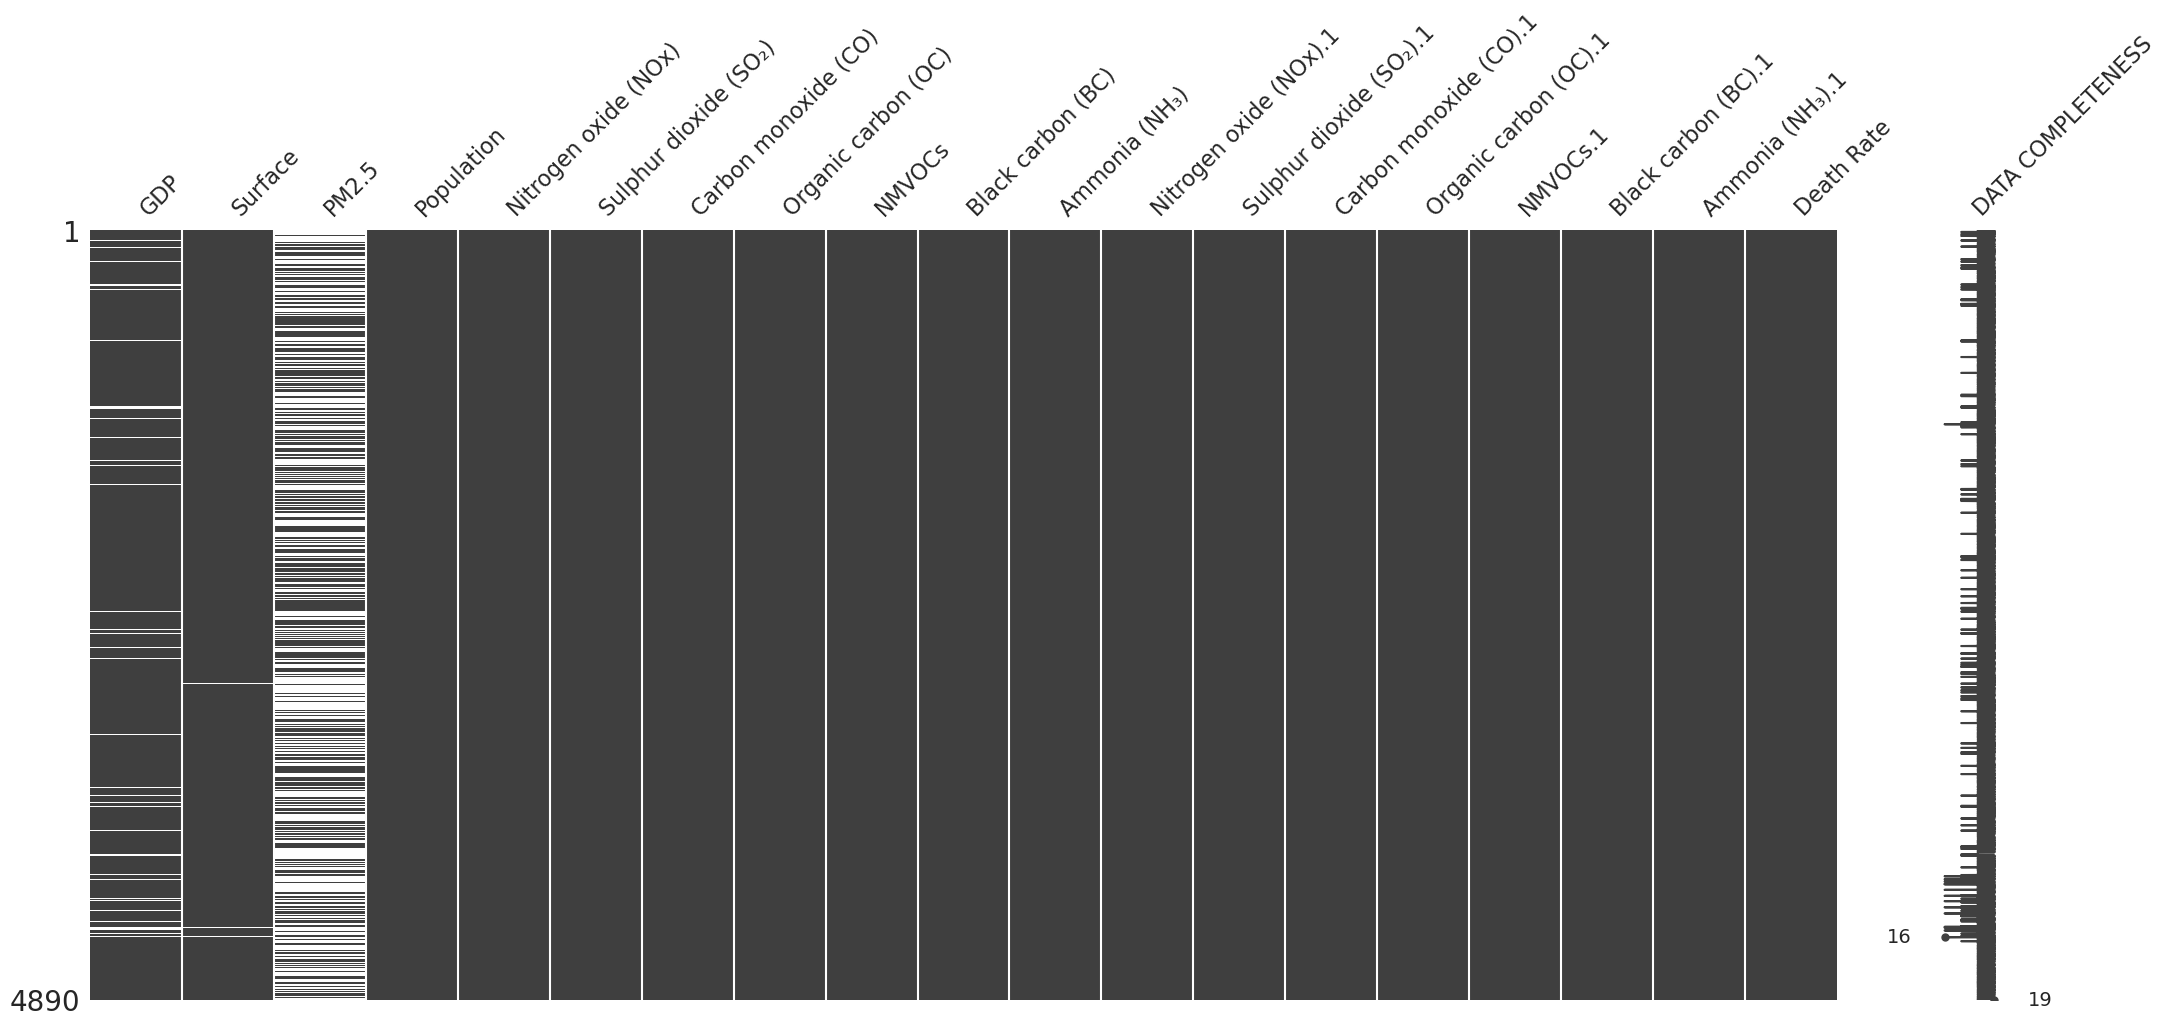

In [314]:
msno.matrix(df_ri.dropna(subset=['Death Rate'], how='any'), labels=True)

In [371]:
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split

def train_xgb(df):

    X = df.loc[:, df.columns != 'Death Rate']
    # X = X.drop(columns = ['Entity', 'Year', 'Code'])
    y = df.loc[:, df.columns =='Death Rate']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    reg_mod = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.08,
        subsample=0.75,
        colsample_bytree=1, 
        max_depth=7,
        gamma=0,
    )

    eval_set = [(X_train, y_train), (X_test, y_test)]
    reg_mod.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)
    # 绘制损失曲线
    sns.set_style("white")
    palette = sns.color_palette("Set2", n_colors=2) 
    return reg_mod, X_test, y_test

def draw_loss(reg_mod, name):
    plt.plot(reg_mod.evals_result()['validation_0']['rmse'], label='train', color=palette[0], linewidth=2)
    plt.plot(reg_mod.evals_result()['validation_1']['rmse'], label='test', color=palette[1], linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    plt.savefig("../fig/Loss_"+name+".png")
    plt.show()

In [323]:
model_cr, X_test_cr, y_test_cr=train_xgb(df_cr)

/opt/conda/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


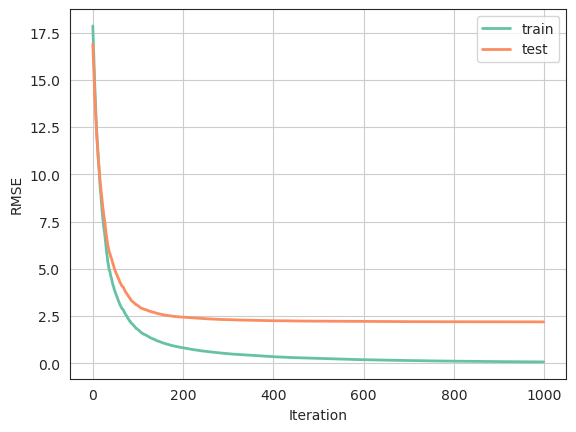

In [372]:
draw_loss(model_cr, "CR")

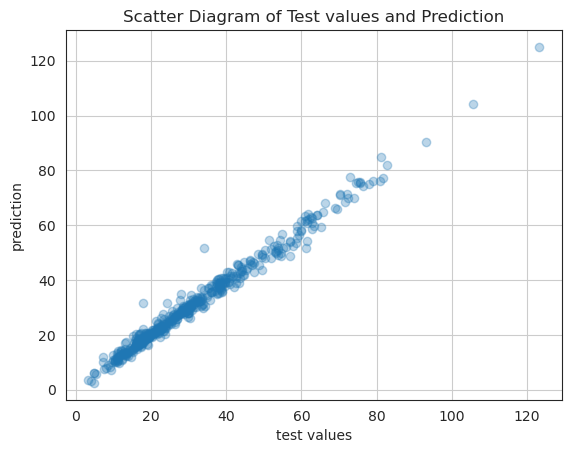

In [369]:
y_pred_cr = model_cr.predict(X_test_cr)
plt.scatter(y_test_cr, y_pred_cr, alpha=0.3)
plt.grid()
plt.xlabel("test values")
plt.ylabel("prediction")
plt.title("Scatter Diagram of Test values and Prediction")
plt.savefig("../fig/yyplot_CR.png")
plt.show()

In [325]:
model_ri, X_test_ri, y_test_ri=train_xgb(df_ri)

/opt/conda/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


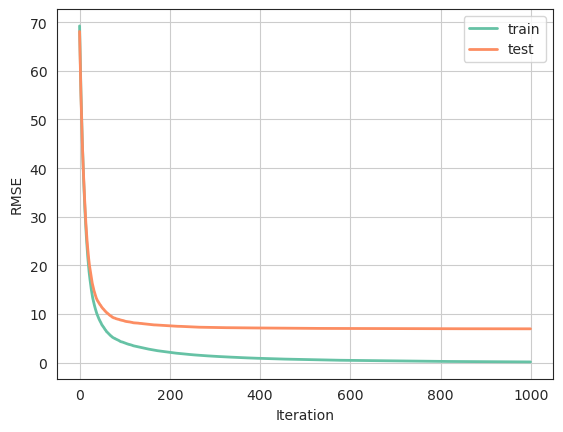

In [373]:
draw_loss(model_ri, "RI")

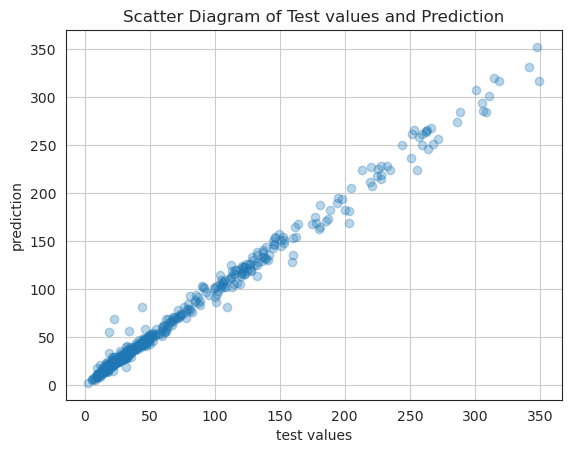

In [370]:
y_pred_ri = model_ri.predict(X_test_ri)
plt.scatter(y_test_ri, y_pred_ri, alpha=0.3)
plt.grid()
plt.xlabel("test values")
plt.ylabel("prediction")
plt.title("Scatter Diagram of Test values and Prediction")
plt.savefig("../fig/yyplot_RI.png")

plt.show()


[0.02353315 0.11311804 0.0038979  0.02654205 0.01618798 0.01823453
 0.01891412 0.04647917 0.0222679  0.02698714 0.01105512 0.46500936
 0.01357463 0.02344412 0.02287523 0.02072789 0.09967233 0.02747937]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

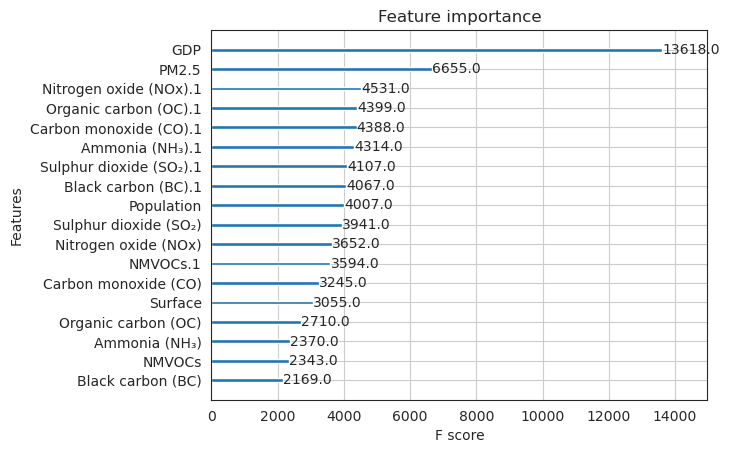

In [375]:
from xgboost import plot_importance

print(model_ri.feature_importances_)
plot_importance(model_ri, )

[0.02514318 0.18057905 0.03767888 0.12197781 0.02979152 0.04131323
 0.0404816  0.06039368 0.03939407 0.02948503 0.10309768 0.03331529
 0.0205866  0.0451732  0.05338199 0.05071318 0.02105185 0.06644212]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

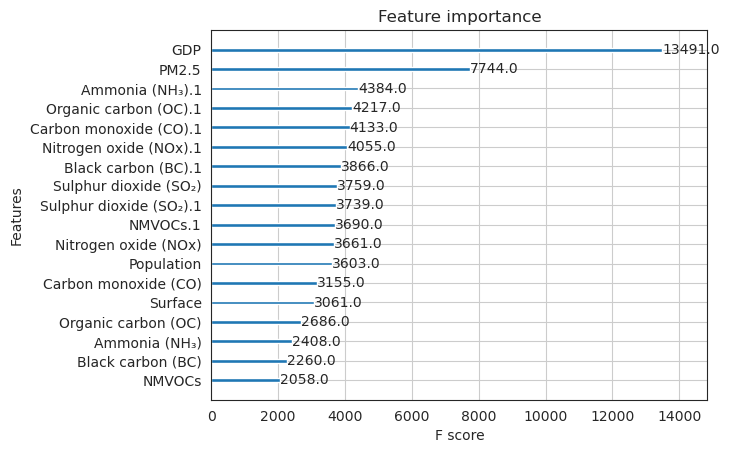

In [376]:
from xgboost import plot_importance

print(model_cr.feature_importances_)
plot_importance(model_cr)

# Conclusion